In [59]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import nltk
import folium
import branca.colormap as cm
import requests
from sklearn.preprocessing import StandardScaler

In [2]:
english_df = pd.read_csv('data/EnglishScrapedData.csv')
complete_df = pd.read_csv('data/completeData.csv')

In [3]:
english_df


Brand Name                                           Products  \
0           0039 Italy                                     ['Womenswear']   
1            05 Studio                           ['Swimwear', 'Bodywear']   
2                 0711                                           ['Bags']   
3               10Days          ['Womenswear', 'Menswear', 'Accessories']   
4           11 Degrees  ['Womenswear', 'Menswear', 'Kidswear', 'Access...   
...                ...                                                ...   
3495         TAG Heuer                                                NaN   
3496  Blue Tomato GmbH                                                NaN   
3497            Armani                                                NaN   
3498            CHANEL                                                NaN   
3499             Prada                         ['Womenswear', 'Menswear']   

                                            Description  \
0     BRAND: 0039 Italy DESCRIPTION: When a German l...   
1     BRAND: 05 Studio DESCRIPTION: We do basics tha...   
2     BRAND: 0711 DESCRIPTION: Brand 0711 was founde...   
3     BRAND: 10Days DESCRIPTION: 10DAYS is an Amster...   
4     BRAND: 11 Degrees DESCRIPTION: Here at 11 Degr...   
...                                                 ...   
3495  BRAND: TAG Heuer DESCRIPTION: TAG Heuer is a w...   
3496  BRAND: Blue Tomato GmbH DESCRIPTION: Blue Toma...   
3497  BRAND: Armani DESCRIPTION: The Armani Group is...   
3498  BRAND: CHANEL DESCRIPTION: CHANEL is a private...   
3499  BRAND: Prada DESCRIPTION: The Prada Group is a...   

                             Website  \
0           http://www.0039italy.com   
1        https://www.the05studio.com   
2             http://0711tbilisi.com   
3     https://www.10dayslifestyle.nl   
4          https://www.11degrees.eu/   
...                              ...   
3495        http://www.tagheuer.com/   
3496                             NaN   
3497          http://www.armani.com/   
3498          http://www.chanel.com/   
3499            http://www.prada.com   

                                       Sentiment_Scores  Compound Sentiment  \
0     {'neg': 0.031, 'neu': 0.772, 'pos': 0.197, 'co...    0.9942  Positive   
1     {'neg': 0.021, 'neu': 0.799, 'pos': 0.18, 'com...    0.9599  Positive   
2     {'neg': 0.0, 'neu': 0.841, 'pos': 0.159, 'comp...    0.9914  Positive   
3     {'neg': 0.0, 'neu': 0.703, 'pos': 0.297, 'comp...    0.9964  Positive   
4     {'neg': 0.0, 'neu': 0.858, 'pos': 0.142, 'comp...    0.9042  Positive   
...                                                 ...       ...       ...   
3495  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000   Neutral   
3496  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000   Neutral   
3497  {'neg': 0.0, 'neu': 0.948, 'pos': 0.052, 'comp...    0.5187  Positive   
3498  {'neg': 0.0, 'neu': 0.852, 'pos': 0.148, 'comp...    0.9552  Positive   
3499  {'neg': 0.0, 'neu': 0.891, 'pos': 0.109, 'comp...    0.7351  Positive   

     Language  
0          en  
1          en  
2          en  
3          en  
4          en  
...       ...  
3495       en  
3496       en  
3497       en  
3498       en  
3499       en  

[3500 rows x 8 columns]

In [4]:
complete_df

Brand Name                                           Products  \
0           0039 Italy                                     ['Womenswear']   
1            05 Studio                           ['Swimwear', 'Bodywear']   
2                 0711                                           ['Bags']   
3               10Days          ['Womenswear', 'Menswear', 'Accessories']   
4           11 Degrees  ['Womenswear', 'Menswear', 'Kidswear', 'Access...   
...                ...                                                ...   
3712         TAG Heuer                                                NaN   
3713  Blue Tomato GmbH                                                NaN   
3714            Armani                                                NaN   
3715            CHANEL                                                NaN   
3716             Prada                         ['Womenswear', 'Menswear']   

                                            Description  \
0     BRAND: 0039 Italy DESCRIPTION: When a German l...   
1     BRAND: 05 Studio DESCRIPTION: We do basics tha...   
2     BRAND: 0711 DESCRIPTION: Brand 0711 was founde...   
3     BRAND: 10Days DESCRIPTION: 10DAYS is an Amster...   
4     BRAND: 11 Degrees DESCRIPTION: Here at 11 Degr...   
...                                                 ...   
3712  BRAND: TAG Heuer DESCRIPTION: TAG Heuer is a w...   
3713  BRAND: Blue Tomato GmbH DESCRIPTION: Blue Toma...   
3714  BRAND: Armani DESCRIPTION: The Armani Group is...   
3715  BRAND: CHANEL DESCRIPTION: CHANEL is a private...   
3716  BRAND: Prada DESCRIPTION: The Prada Group is a...   

                             Website  \
0           http://www.0039italy.com   
1        https://www.the05studio.com   
2             http://0711tbilisi.com   
3     https://www.10dayslifestyle.nl   
4          https://www.11degrees.eu/   
...                              ...   
3712        http://www.tagheuer.com/   
3713                             NaN   
3714          http://www.armani.com/   
3715          http://www.chanel.com/   
3716            http://www.prada.com   

                                       Sentiment_Scores  Compound Sentiment  \
0     {'neg': 0.031, 'neu': 0.772, 'pos': 0.197, 'co...    0.9942  Positive   
1     {'neg': 0.021, 'neu': 0.799, 'pos': 0.18, 'com...    0.9599  Positive   
2     {'neg': 0.0, 'neu': 0.841, 'pos': 0.159, 'comp...    0.9914  Positive   
3     {'neg': 0.0, 'neu': 0.703, 'pos': 0.297, 'comp...    0.9964  Positive   
4     {'neg': 0.0, 'neu': 0.858, 'pos': 0.142, 'comp...    0.9042  Positive   
...                                                 ...       ...       ...   
3712  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000   Neutral   
3713  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000   Neutral   
3714  {'neg': 0.0, 'neu': 0.948, 'pos': 0.052, 'comp...    0.5187  Positive   
3715  {'neg': 0.0, 'neu': 0.852, 'pos': 0.148, 'comp...    0.9552  Positive   
3716  {'neg': 0.0, 'neu': 0.891, 'pos': 0.109, 'comp...    0.7351  Positive   

     Language  
0          en  
1          en  
2          en  
3          en  
4          en  
...       ...  
3712       en  
3713       en  
3714       en  
3715       en  
3716       en  

[3717 rows x 8 columns]

In [5]:
df_top = pd.read_csv('data/Finaldf.csv').drop('Unnamed: 0', axis=1)
df_top

Brand  Afghanistan  Albania  Algeria  American Samoa  Andorra  \
0                NIKE            0        0       11               0        0   
1   POLO RALPH LAUREN            0        0        0               0        0   
2      THE NORTH FACE            0        0        0               0        0   
3       LOUIS VUITTON            0        0       23               0        0   
4              UNIQLO            0        0        0               0        0   
..                ...          ...      ...      ...             ...      ...   
89          TAG HEUER            0        0        0               0        0   
90    BANANA REPUBLIC            0        0        0               0        0   
91           DESIGUAL            0        0        0               0        0   
92            CAVALLI            0       23        2               0        0   
93          TED BAKER            0        0        0               0        0   

    Angola  Anguilla  Antarctica  Antigua & Barbuda  ...  Wallis & Futuna  \
0        0         0           0                  0  ...                0   
1        0         0           0                  0  ...                0   
2        0         0           0                  0  ...                0   
3        0         0           0                  0  ...                0   
4        0         0           0                  0  ...                0   
..     ...       ...         ...                ...  ...              ...   
89       0         0           0                  0  ...                0   
90       0         0           0                  0  ...                0   
91       0         0           0                  0  ...                0   
92       0         0           0                  0  ...                0   
93       0         0           0                  0  ...                0   

    Western Sahara  Yemen  Zambia  Zimbabwe  Åland Islands  \
0                0      0       0         0              0   
1                0      0       0         0              0   
2                0      0       0         0              0   
3                0      0       0         0              0   
4                0      0       0         0              0   
..             ...    ...     ...       ...            ...   
89               0      0       0         0              0   
90               0      0       0         0              0   
91               0      0       0         0              0   
92               0      0       0         0              0   
93               0      0       0         0              0   

    2023 Brand Value in $                                           Products  \
0                  $42.5B                                     ['Sportswear']   
1                   $4.7B  ['Accessories', 'Bags', 'Eyewear', 'Footwear',...   
2                   $4.6B          ['Womenswear', 'Menswear', 'Accessories']   
3                  $36.4B          ['Womenswear', 'Menswear', 'Accessories']   
4                   $9.4B                                                NaN   
..                    ...                                                ...   
89                  $645M                                                NaN   
90                  $640M  ['Womenswear', 'Menswear', 'Kidswear', 'Footwe...   
91                  $627M  ['Womenswear', 'Menswear', 'Kidswear', 'Sports...   
92                  $622M  ['Womenswear', 'Menswear', 'Kidswear', 'Footwe...   
93                  $100M  ['Accessories', 'Bags', 'Eyewear', 'Jewelry', ...   

                                          Description  \
0   Our mission is what drives us to do everything...   
1   Ralph Lauren is a US-based designer and retail...   
2   Founded by husband and wife Douglas and Susie ...   
3   LOUIS VUITTON ist seit über 160 Jahren eine de...   
4   Uniqlo is a modern Japanese company that inspi...   
..                                                ...   
89  TAG Heuer

In [6]:
counter = 0
lowererd = [i.lower() for i in english_df["Brand Name"].unique()]
for i in df_top["Brand"].unique():
    if i.lower() in lowererd:
        counter += 1
    else:
        print(i)
print(counter)

LOUIS VUITTON
93


## Data Preprocessing

### English data

In [8]:
import nltk
nltk.download('stopwords')

# Load the stopwords
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tedoc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
english_df['Description_processed'] = english_df['Description'].apply(preprocess_text)

In [10]:
from collections import Counter

# Combine all preprocessed text into a single string
all_words = ' '.join(english_df['Description_processed']).split()

# Count the frequency of each word
word_counts = Counter(all_words)

# Get the most common words
most_common_words = word_counts.most_common(10)  # Top 10 most common words

# Display the results
print("Most Common Words:")
for word, count in most_common_words:
    print(f"{word}: {count}")

Most Common Words:
BRAND:: 3500
DESCRIPTION:: 3500
Photo: 3073
credit:: 3058
E:: 2440
brand: 2300
Wholesale: 2126
fashion: 1990
quality: 1168
design: 1119


In [11]:
df_top['Description_processed'] = df_top['Description'].apply(preprocess_text)

In [12]:
df_top

Brand  Afghanistan  Albania  Algeria  American Samoa  Andorra  \
0                NIKE            0        0       11               0        0   
1   POLO RALPH LAUREN            0        0        0               0        0   
2      THE NORTH FACE            0        0        0               0        0   
3       LOUIS VUITTON            0        0       23               0        0   
4              UNIQLO            0        0        0               0        0   
..                ...          ...      ...      ...             ...      ...   
89          TAG HEUER            0        0        0               0        0   
90    BANANA REPUBLIC            0        0        0               0        0   
91           DESIGUAL            0        0        0               0        0   
92            CAVALLI            0       23        2               0        0   
93          TED BAKER            0        0        0               0        0   

    Angola  Anguilla  Antarctica  Antigua & Barbuda  ...  Western Sahara  \
0        0         0           0                  0  ...               0   
1        0         0           0                  0  ...               0   
2        0         0           0                  0  ...               0   
3        0         0           0                  0  ...               0   
4        0         0           0                  0  ...               0   
..     ...       ...         ...                ...  ...             ...   
89       0         0           0                  0  ...               0   
90       0         0           0                  0  ...               0   
91       0         0           0                  0  ...               0   
92       0         0           0                  0  ...               0   
93       0         0           0                  0  ...               0   

    Yemen  Zambia  Zimbabwe  Åland Islands  2023 Brand Value in $  \
0       0       0         0              0                 $42.5B   
1       0       0         0              0                  $4.7B   
2       0       0         0              0                  $4.6B   
3       0       0         0              0                 $36.4B   
4       0       0         0              0                  $9.4B   
..    ...     ...       ...            ...                    ...   
89      0       0         0              0                  $645M   
90      0       0         0              0                  $640M   
91      0       0         0              0                  $627M   
92      0       0         0              0                  $622M   
93      0       0         0              0                  $100M   

                                             Products  \
0                                      ['Sportswear']   
1   ['Accessories', 'Bags', 'Eyewear', 'Footwear',...   
2           ['Womenswear', 'Menswear', 'Accessories']   
3           ['Womenswear', 'Menswear', 'Accessories']   
4                                                 NaN   
..                                                ...   
89                                                NaN   
90  ['Womenswear', 'Menswear', 'Kidswear', 'Footwe...   
91  ['Womenswear', 'Menswear', 'Kidswear', 'Sports...   
92  ['Womenswear', 'Menswear', 'Kidswear', 'Footwe...   
93  ['Accessories', 'Bags', 'Eyewear', 'Jewelry', ...   

                                          Description  \
0   Our mission is what drives us to do everything...   
1   Ralph Lauren is a US-based designer and retail...   
2   Founded by husband and wife Douglas and Susie ...   
3   LOUIS VUITTON ist seit über 160 Jahren eine de...   
4   Uniqlo is a modern Japanese company that inspi...   
..                                                ...   
89  TAG Heuer is a watch company founded in 1860 b...   
90  Banana Republic is a clothing and accessories ...   
91  Thomas Meyer created Desigual in 1984, in the ...   
92  Founded in 1970, Roberto Cavalli is an Ita

In [13]:
brand_to_visualize = "CAVALLI"

def viz_google_trends(brand):
    # Filter the data for the selected brand
    if isinstance(brand, str):
        brand_data = df_top[df_top["Brand"] == brand].iloc[0].drop(
            ["Brand", "2023 Brand Value in $", "Products", "Description", "Website", "Description_processed"]
        )
    else:
        brand_data = brand.drop(
            ["Brand", "2023 Brand Value in $", "Products", "Description", "Website", "Description_processed"]
        )
        
    # Create a DataFrame with country and value
    brand_df = pd.DataFrame({
        "Country": brand_data.index,  # Country names from the columns
        "Value": brand_data.values,  # Values for the selected brand
    })
    
    # Convert the DataFrame to a dictionary for easy lookup
    value_dict = brand_df.set_index('Country')['Value'].to_dict()

    # Load a GeoJSON file for world boundaries
    geojson_url = "https://raw.githubusercontent.com/python-visualization/folium/main/examples/data/world-countries.json"

    # Create a Folium map
    m = folium.Map(location=[0, 0], zoom_start=2, max_width=100)

    min_value = brand_df["Value"].min()
    max_value = brand_df["Value"].max()

    # Create a color map using a predefined color scale ("OrRd")
    colormap = cm.linear.OrRd_09.scale(min_value, max_value)
    
    # Add a Choropleth layer
    folium.Choropleth(
        geo_data=geojson_url,
        data=brand_df,
        columns=["Country", "Value"],  # Data columns: Country and Value
        key_on="feature.properties.name",  # Matches GeoJSON's country name field
        fill_color="OrRd",
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name=f"{brand} Value",
    ).add_to(m)

    # Add tooltips that show the value for each country
    folium.GeoJson(
        geojson_url,
        style_function=lambda x: {"fillColor": "transparent", "color": "black", "weight": 0.5},
        tooltip=folium.GeoJsonTooltip(
            fields=["name"],  # Country name comes from the GeoJSON properties
            aliases=["Country:"],
            localize=True,
            labels=True,
            sticky=True
        ),
        # Custom popup with the value corresponding to each country
        popup=folium.GeoJsonPopup(
            fields=["name"],  # Country name comes from the GeoJSON properties
            labels=False,
            localize=True,
            style="background-color: yellow;",
            parse_html=True,
            max_width=300,
            sticky=True
        ).add_child(folium.Popup(
            html="Click on a country to view its value!",
            max_width=300,
        )),
    ).add_to(m)

    return m

In [39]:
df_top.rename(columns={"United States": "United States of America"}, inplace=True)
df_top.rename(columns={"Czechia": "Czech Republic"}, inplace=True)
df_top.rename(columns={"Serbia": "Republic of Serbia"}, inplace=True)
df_top.rename(columns={"North Macedonia": "Macedonia"}, inplace=True)
df_top.rename(columns={"Bosnia & Herzegovina": "Bosnia and Herzegovina"}, inplace=True)
df_top.rename(columns={"Türkiye": "Turkey"}, inplace=True)
df_top.rename(columns={"Congo - Kinshasa": "Democratic Republic of the Congo"}, inplace=True)
df_top.rename(columns={"Congo - Brazzaville": "Republic of the Congo"}, inplace=True)
df_top.rename(columns={"Tanzania": "United Republic of Tanzania"}, inplace=True)
df_top.rename(columns={"Côte d’Ivoire": "Ivory Coast"}, inplace=True)
df_top.rename(columns={"Myanmar (Burma)": "Myanmar"}, inplace=True)
df_top.rename(columns={"Djibouti": "Djibouti"}, inplace=True)



In [52]:
df_top.rename(columns={"Bahamas": "The Bahamas"}, inplace=True)
df_top.rename(columns={"Trinidad & Tobago": "Trinidad and Tobago"}, inplace=True)
df_top.rename(columns={"Guinea-Bissau": "Guinea Bissau"}, inplace=True)
df_top.rename(columns={"Palestine": "West Bank"}, inplace=True)

In [51]:
[s for s in df_top.columns if "cyp" in s.lower()]

['Cyprus']

In [53]:
nike = viz_google_trends("NIKE")

In [54]:
viz_google_trends("NIKE")

In [55]:
def get_dict_data(brand, head=10):
    if isinstance(brand, str):
        brand_data = df_top[df_top["Brand"] == brand].iloc[0].drop(
            ["Brand", "2023 Brand Value in $", "Products", "Description", "Website", "Description_processed"]
        )
    else:
        brand_data = brand.drop(
            ["Brand", "2023 Brand Value in $", "Products", "Description", "Website", "Description_processed"]
        )
    # Create a DataFrame with country and value
    brand_df = pd.DataFrame({
        "Country": brand_data.index,  # Country names from the columns
        "Value": brand_data.values,  # Values for the selected brand
    })

    return brand_df.sort_values(by="Value", ascending=False).head(head)

In [56]:
get_dict_data("NIKE", 20)

Country Value
193                  Slovakia   100
180                   Romania    52
44                      Chile    52
86                     Greece    51
236            United Kingdom    50
176                    Poland    49
154               Netherlands    49
197              South Africa    46
106                   Ireland    45
76                     France    43
58             Czech Republic    43
201                     Spain    40
100                   Hungary    40
188        Republic of Serbia    38
60                    Denmark    38
177                  Portugal    36
237  United States of America    36
33                   Bulgaria    36
141                    Mexico    34
12                  Australia    34

## Modeling

In [57]:
df_top

Brand  Afghanistan  Albania  Algeria  American Samoa  Andorra  \
0                NIKE            0        0       11               0        0   
1   POLO RALPH LAUREN            0        0        0               0        0   
2      THE NORTH FACE            0        0        0               0        0   
3       LOUIS VUITTON            0        0       23               0        0   
4              UNIQLO            0        0        0               0        0   
..                ...          ...      ...      ...             ...      ...   
89          TAG HEUER            0        0        0               0        0   
90    BANANA REPUBLIC            0        0        0               0        0   
91           DESIGUAL            0        0        0               0        0   
92            CAVALLI            0       23        2               0        0   
93          TED BAKER            0        0        0               0        0   

    Angola  Anguilla  Antarctica  Antigua & Barbuda  ...  Western Sahara  \
0        0         0           0                  0  ...               0   
1        0         0           0                  0  ...               0   
2        0         0           0                  0  ...               0   
3        0         0           0                  0  ...               0   
4        0         0           0                  0  ...               0   
..     ...       ...         ...                ...  ...             ...   
89       0         0           0                  0  ...               0   
90       0         0           0                  0  ...               0   
91       0         0           0                  0  ...               0   
92       0         0           0                  0  ...               0   
93       0         0           0                  0  ...               0   

    Yemen  Zambia  Zimbabwe  Åland Islands  2023 Brand Value in $  \
0       0       0         0              0                 $42.5B   
1       0       0         0              0                  $4.7B   
2       0       0         0              0                  $4.6B   
3       0       0         0              0                 $36.4B   
4       0       0         0              0                  $9.4B   
..    ...     ...       ...            ...                    ...   
89      0       0         0              0                  $645M   
90      0       0         0              0                  $640M   
91      0       0         0              0                  $627M   
92      0       0         0              0                  $622M   
93      0       0         0              0                  $100M   

                                             Products  \
0                                      ['Sportswear']   
1   ['Accessories', 'Bags', 'Eyewear', 'Footwear',...   
2           ['Womenswear', 'Menswear', 'Accessories']   
3           ['Womenswear', 'Menswear', 'Accessories']   
4                                                 NaN   
..                                                ...   
89                                                NaN   
90  ['Womenswear', 'Menswear', 'Kidswear', 'Footwe...   
91  ['Womenswear', 'Menswear', 'Kidswear', 'Sports...   
92  ['Womenswear', 'Menswear', 'Kidswear', 'Footwe...   
93  ['Accessories', 'Bags', 'Eyewear', 'Jewelry', ...   

                                          Description  \
0   Our mission is what drives us to do everything...   
1   Ralph Lauren is a US-based designer and retail...   
2   Founded by husband and wife Douglas and Susie ...   
3   LOUIS VUITTON ist seit über 160 Jahren eine de...   
4   Uniqlo is a modern Japanese company that inspi...   
..                                                ...   
89  TAG Heuer is a watch company founded in 1860 b...   
90  Banana Republic is a clothing and accessories ...   
91  Thomas Meyer created Desigual in 1984, in the ...   
92  Founded in 1970, Roberto Cavalli is an Ita

In [58]:
x_tf = df_top.drop(["2023 Brand Value in $", "Products", "Description", "Website", "Description_processed"], axis=1)
x_tf

Brand  Afghanistan  Albania  Algeria  American Samoa  Andorra  \
0                NIKE            0        0       11               0        0   
1   POLO RALPH LAUREN            0        0        0               0        0   
2      THE NORTH FACE            0        0        0               0        0   
3       LOUIS VUITTON            0        0       23               0        0   
4              UNIQLO            0        0        0               0        0   
..                ...          ...      ...      ...             ...      ...   
89          TAG HEUER            0        0        0               0        0   
90    BANANA REPUBLIC            0        0        0               0        0   
91           DESIGUAL            0        0        0               0        0   
92            CAVALLI            0       23        2               0        0   
93          TED BAKER            0        0        0               0        0   

    Angola  Anguilla  Antarctica  Antigua & Barbuda  ...  Vanuatu  \
0        0         0           0                  0  ...        0   
1        0         0           0                  0  ...        0   
2        0         0           0                  0  ...        0   
3        0         0           0                  0  ...        0   
4        0         0           0                  0  ...        0   
..     ...       ...         ...                ...  ...      ...   
89       0         0           0                  0  ...        0   
90       0         0           0                  0  ...        0   
91       0         0           0                  0  ...        0   
92       0         0           0                  0  ...        0   
93       0         0           0                  0  ...        0   

    Vatican City  Venezuela  Vietnam  Wallis & Futuna  Western Sahara  Yemen  \
0              0         11       10                0               0      0   
1              0          0        5                0               0      0   
2              0          0       12                0               0      0   
3              0          0       16                0               0      0   
4              0          0       15                0               0      0   
..           ...        ...      ...              ...             ...    ...   
89             0         14        7                0               0      0   
90             0          0        3                0               0      0   
91             0         10        0                0               0      0   
92             0          0        0                0               0      0   
93             0          0        1                0               0      0   

    Zambia  Zimbabwe  Åland Islands  
0        0         0              0  
1        0         0              0  
2        0         0              0  
3        0         0              0  
4        0         0              0  
..     ...       ...            ...  
89       0         0              0  
90       0         0              0  
91       0         0              0  
92       0         0              0  
93       0         0              0  

[94 rows x 251 columns]

In [60]:
scaler = StandardScaler()
df_google = pd.DataFrame(scaler.fit_transform(x_tf.drop("Brand", axis=1)), columns=x_tf.columns[1:256])
# retain the Brand column

In [61]:
df_google

Afghanistan   Albania   Algeria  American Samoa  Andorra    Angola  \
0           0.0 -0.468811  0.684089             0.0      0.0 -0.103695   
1           0.0 -0.468811 -0.623393             0.0      0.0 -0.103695   
2           0.0 -0.468811 -0.623393             0.0      0.0 -0.103695   
3           0.0 -0.468811  2.110433             0.0      0.0 -0.103695   
4           0.0 -0.468811 -0.623393             0.0      0.0 -0.103695   
..          ...       ...       ...             ...      ...       ...   
89          0.0 -0.468811 -0.623393             0.0      0.0 -0.103695   
90          0.0 -0.468811 -0.623393             0.0      0.0 -0.103695   
91          0.0 -0.468811 -0.623393             0.0      0.0 -0.103695   
92          0.0  0.339458 -0.385669             0.0      0.0 -0.103695   
93          0.0 -0.468811 -0.623393             0.0      0.0 -0.103695   

    Anguilla  Antarctica  Antigua & Barbuda  Argentina  ...  Vanuatu  \
0        0.0         0.0                0.0   0.888718  ...      0.0   
1        0.0         0.0                0.0  -0.403130  ...      0.0   
2        0.0         0.0                0.0   0.781064  ...      0.0   
3        0.0         0.0                0.0  -0.080168  ...      0.0   
4        0.0         0.0                0.0  -0.456957  ...      0.0   
..       ...         ...                ...        ...  ...      ...   
89       0.0         0.0                0.0   0.081313  ...      0.0   
90       0.0         0.0                0.0  -0.403130  ...      0.0   
91       0.0         0.0                0.0  -0.026341  ...      0.0   
92       0.0         0.0                0.0  -0.510784  ...      0.0   
93       0.0         0.0                0.0  -0.564611  ...      0.0   

    Vatican City  Venezuela   Vietnam  Wallis & Futuna  Western Sahara  Yemen  \
0            0.0   1.201247  0.178568              0.0             0.0    0.0   
1            0.0  -0.439558 -0.362897              0.0             0.0    0.0   
2            0.0  -0.439558  0.395155              0.0             0.0    0.0   
3            0.0  -0.439558  0.828327              0.0             0.0    0.0   
4            0.0  -0.439558  0.720034              0.0             0.0    0.0   
..           ...        ...       ...              ...             ...    ...   
89           0.0   1.648739 -0.146311              0.0             0.0    0.0   
90           0.0  -0.439558 -0.579483              0.0             0.0    0.0   
91           0.0   1.052083 -0.904363              0.0             0.0    0.0   
92           0.0  -0.439558 -0.904363              0.0             0.0    0.0   
93           0.0  -0.439558 -0.796070              0.0             0.0    0.0   

    Zambia  Zimbabwe  Åland Islands  
0      0.0       0.0            0.0  
1      0.0       0.0            0.0  
2      0.0       0.0            0.0  
3      0.0       0.0            0.0  
4      0.0       0.0            0.0  
..     ...       ...            ...  
89     0.0       0.0            0.0  
90     0.0       0.0            0.0  
91     0.0       0.0            0.0  
92     0.0       0.0            0.0  
93     0.0       0.0            0.0  

[94 rows x 250 columns]

In [62]:
from sklearn.cluster import KMeans

# Set number of clusters (this can be tuned based on your data)
n_clusters = 5
kmeans_google = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the model on the scaled data (excluding the "Brand" column)
df_top['Cluster'] = kmeans_google.fit_predict(df_google)

# View the resulting clusters
print(df_top[['Brand', 'Cluster']])

                Brand  Cluster
0                NIKE        4
1   POLO RALPH LAUREN        1
2      THE NORTH FACE        4
3       LOUIS VUITTON        4
4              UNIQLO        1
..                ...      ...
89          TAG HEUER        4
90    BANANA REPUBLIC        1
91           DESIGUAL        1
92            CAVALLI        1
93          TED BAKER        1

[94 rows x 2 columns]


C:\Users\tedoc\AppData\Local\Temp\ipykernel_16120\2906311354.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sampled = df_pca.groupby('Cluster').apply(lambda x: x.sample(min(20, len(x)))).reset_index(drop=True)


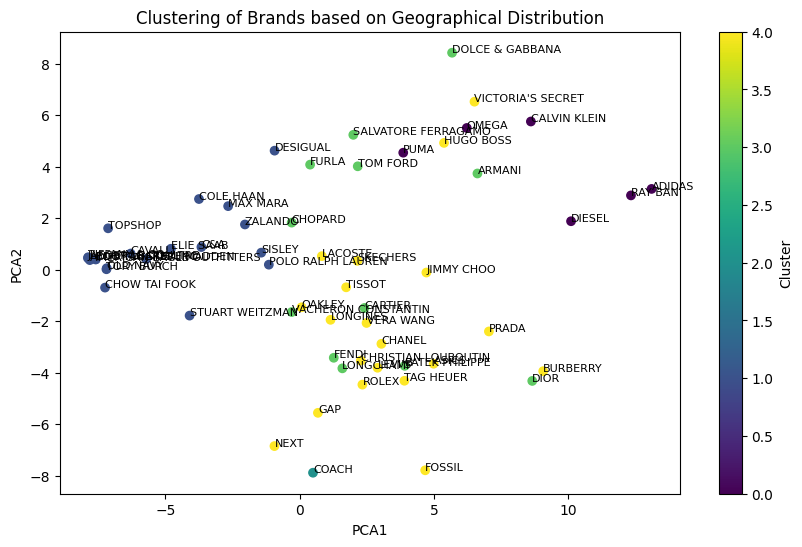

In [63]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_google)

# Create a DataFrame with the PCA results and the cluster labels
df_pca = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])
df_pca['Brand'] = df_top['Brand']
df_pca['Cluster'] = df_top['Cluster']

# Get 10 random brands per cluster
df_sampled = df_pca.groupby('Cluster').apply(lambda x: x.sample(min(20, len(x)))).reset_index(drop=True)

# Plot the clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_sampled['PCA1'], df_sampled['PCA2'], c=df_sampled['Cluster'], cmap='viridis')

# Annotate the sampled brands
for i, brand in enumerate(df_sampled['Brand']):
    plt.annotate(brand, (df_sampled['PCA1'].iloc[i], df_sampled['PCA2'].iloc[i]), fontsize=8)

plt.title("Clustering of Brands based on Geographical Distribution")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.colorbar(scatter, label='Cluster')
plt.show()

We see that in the yellow cluster we have: Burberry, Gucci, Pradam Armani, Calvin Klein which are simillar high end luxary brands. But we also have H&M, New Balance which doesnt make sense to be in this gorup. Also we see Dolce & Gabbana to be gropued by its own with Chanel, Dior.
Why those luxary brands are not in same cluster group?

In [64]:
df_top.groupby('Cluster').sum()["Brand"].loc[0]

'PUMAADIDASOMEGARAY BANDIESELCALVIN KLEIN'

In [66]:
gropued = df_top.groupby("Cluster").sum().reset_index()
gropued


Cluster                                              Brand  Afghanistan  \
0        0           PUMAADIDASOMEGARAY BANDIESELCALVIN KLEIN            0   
1        1  POLO RALPH LAURENUNIQLOURBAN OUTFITTERSALDOCOL...            0   
2        2                                              COACH            0   
3        3  VACHERON CONSTANTINPATEK PHILIPPEARMANIDIORSAL...            0   
4        4  NIKETHE NORTH FACELOUIS VUITTONBURBERRYOAKLEYJ...            0   

   Albania  Algeria  American Samoa  Andorra  Angola  Anguilla  Antarctica  \
0        0       97               0        0       0         0           0   
1      269       40               0        0      39         0           0   
2        0        0               0        0       0         0           0   
3      708      137               0        0       0         0           0   
4      277      219               0        0       0         0           0   

   ...  Western Sahara  Yemen  Zambia  Zimbabwe  Åland Islands  \
0  ...               0      0       0         0              0   
1  ...               0      0       0         0              0   
2  ...               0      0       0         0              0   
3  ...               0      0       0         0              0   
4  ...               0      0       0         0              0   

                               2023 Brand Value in $  \
0                    $2.4B$16.1B$2.9B$2.7B$1.6B$1.5B   
1  $4.7B$9.4B$2B$1B$975M$869M$4.8B$2.2B$2.1B$2.1B...   
2                                              $5.5B   
3  $816M$4.9B$2.1B$17.6B$1.9B$11.2B$4.7B$3.1B$3.2...   
4  $42.5B$4.6B$36.4B$5.2B$1B$943M$4.8B$4.2B$4.1B$...   

                                            Products  \
0  ['Menswear', 'Womenswear', 'Footwear', 'Sports...   
1  ['Accessories', 'Bags', 'Eyewear', 'Footwear',...   
2  ['Womenswear', 'Menswear', 'Bags', 'Footwear',...   
3  ['Jewelry']['Womenswear', 'Menswear', 'Bags', ...   
4  ['Sportswear']['Womenswear', 'Menswear', 'Acce...   

                                         Description  \
0  Sport has the power to transform and empower u...   
1  Ralph Lauren is a US-based designer and retail...   
2  Coach is a global fashion house founded in New...   
3  The world's oldest watch manufacturer in conti...   
4  Our mission is what drives us to do everything...   

                                             Website  \
0  https://www.puma.comhttp://www.adidas-group.co...   
1  https://www.poloralphlauren.comhttp://www.uniq...   
2                               https://uk.coach.com   
3  https://www.vacheron-constantin.comhttp://www....   
4  http://nike.comhttps://www.thenorthface.comhtt...   

                               Description_processed  
0  Sport power transform empower us. one world’s ...  
1  Ralph Lauren US-based designer retailer high-e...  
2  Coach global fashion house founded New York 19...  
3  world's oldest watch manufacturer continuous o...  
4  mission drives us everything possible expand h...  

[5 rows x 257 columns]

In [67]:
viz_google_trends(gropued[gropued["Cluster"] == 0].iloc[0])


In [68]:
viz_google_trends(gropued[gropued["Cluster"] == 1].iloc[0])

In [69]:
viz_google_trends(gropued[gropued["Cluster"] == 2].iloc[0])

In [70]:
viz_google_trends(gropued[gropued["Cluster"] == 3].iloc[0])

In [71]:
viz_google_trends(gropued[gropued["Cluster"] == 4].iloc[0])

In [72]:
x_tf["Cluster"] = df_top["Cluster"]
x_tf["Brand"] = df_top["Brand"]

C:\Users\tedoc\AppData\Local\Temp\ipykernel_16120\3152522943.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sampled = df_clustered.groupby('Cluster').apply(lambda x: x.sample(min(35, len(x)), random_state=1)).reset_index(drop=True)


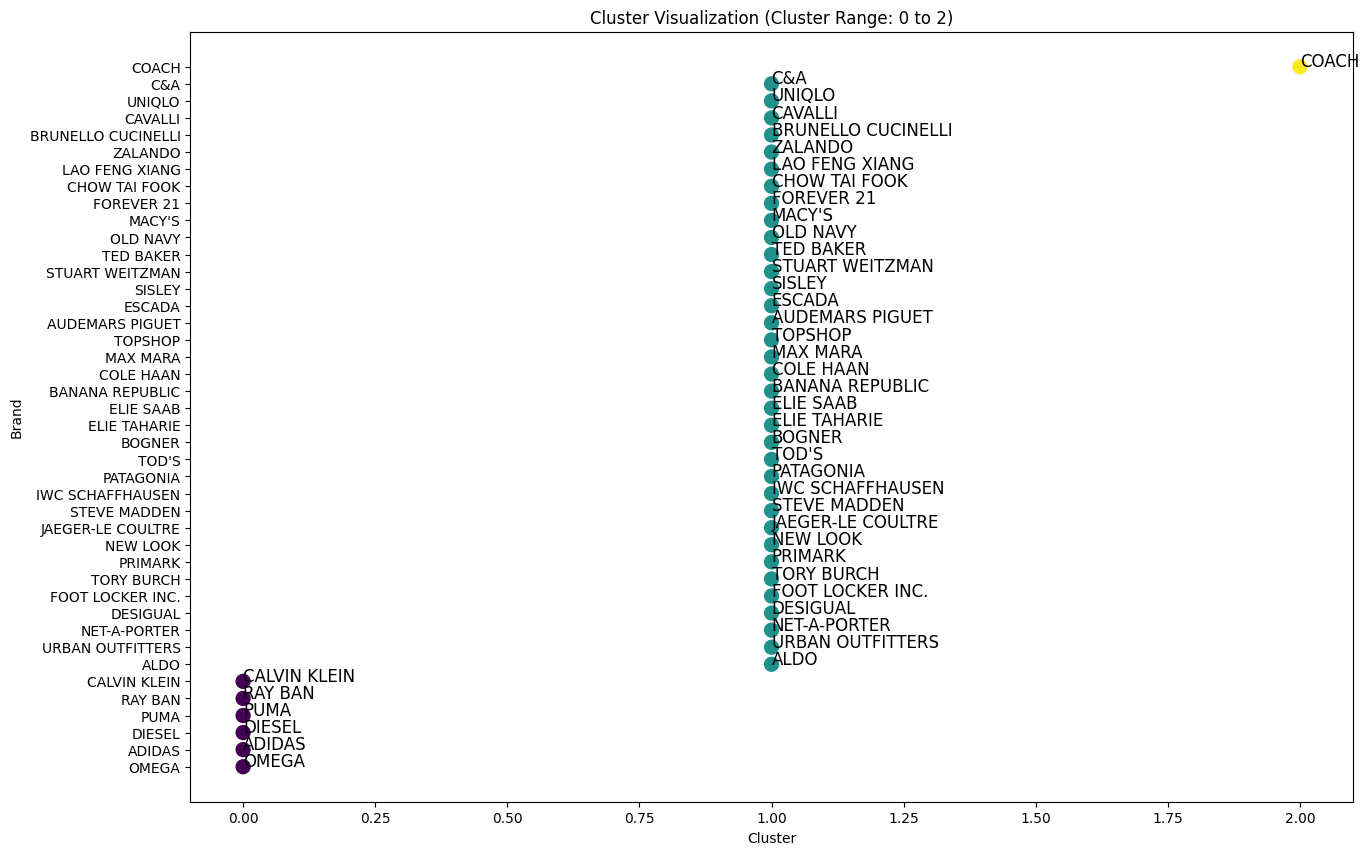

C:\Users\tedoc\AppData\Local\Temp\ipykernel_16120\3152522943.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sampled = df_clustered.groupby('Cluster').apply(lambda x: x.sample(min(35, len(x)), random_state=1)).reset_index(drop=True)


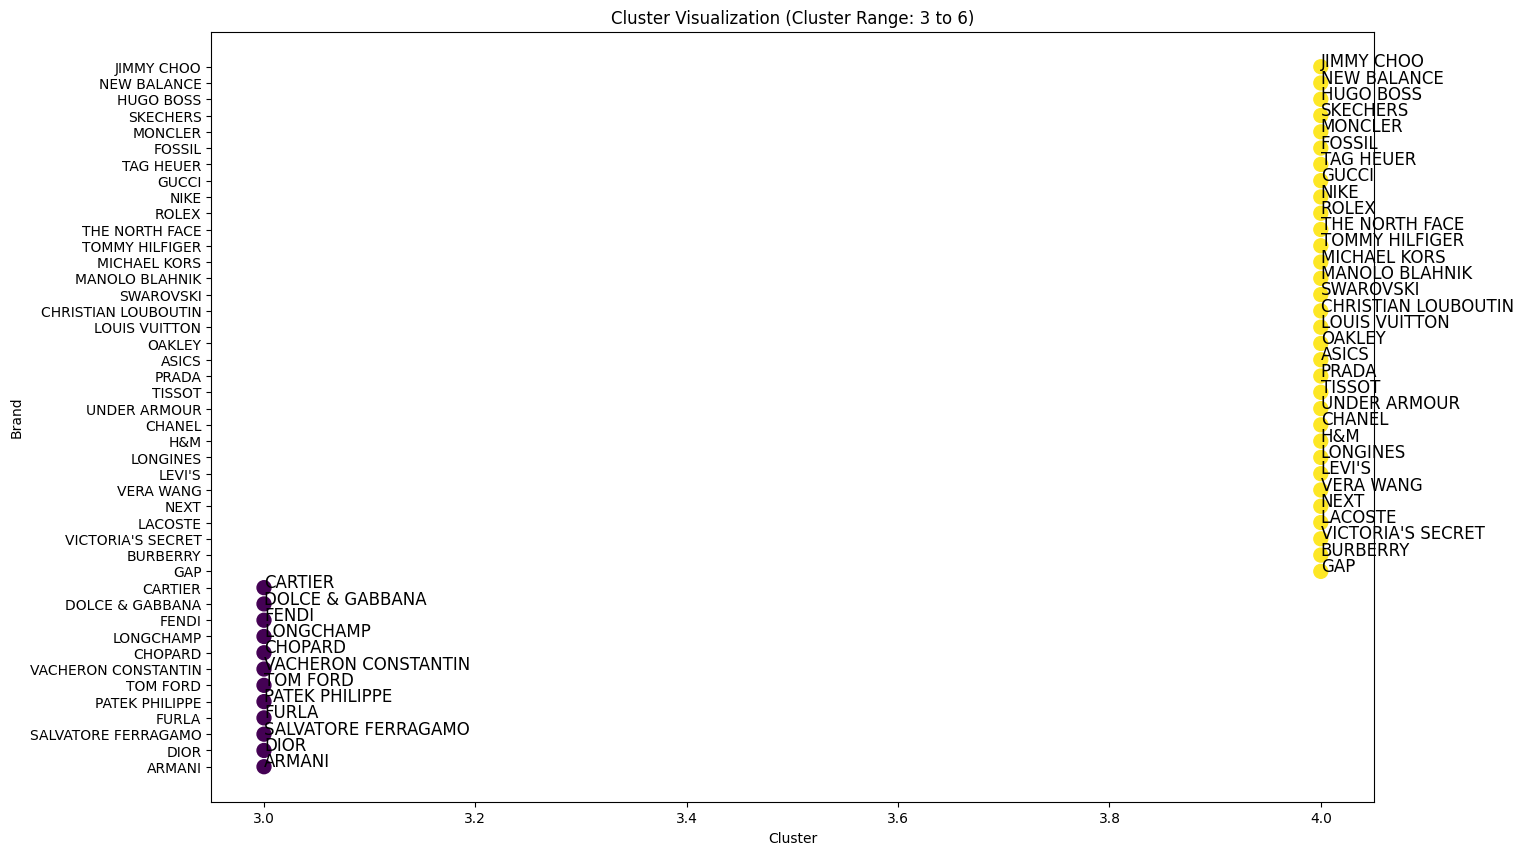

In [73]:

import matplotlib.pyplot as plt
# Create a figure and axis
# Filter for each cluster range
# Function to plot clusters
def plot_clusters(df, cluster_range):
    # Filter the data for the cluster range
    df_clustered = df[df['Cluster'].isin(cluster_range)]
    
    # Sample 10 brands per cluster if there are more than 10, otherwise use all the brands
    df_sampled = df_clustered.groupby('Cluster').apply(lambda x: x.sample(min(35, len(x)), random_state=1)).reset_index(drop=True)
    
    # Create the plot
    plt.figure(figsize=(15, 10))
    plt.scatter(df_sampled['Cluster'], df_sampled['Brand'], c=df_sampled['Cluster'], cmap='viridis', s=100)
    
    # Annotate each point with the brand name
    for i, row in df_sampled.iterrows():
        plt.annotate(row['Brand'], (row['Cluster'], row['Brand']), fontsize=12)
    
    # Set plot title and labels
    plt.title(f"Cluster Visualization (Cluster Range: {cluster_range[0]} to {cluster_range[-1]})")
    plt.xlabel("Cluster")
    plt.ylabel("Brand")
    plt.show()

# Plot for Cluster 1 to 3
plot_clusters(x_tf, [0, 1, 2])

# Plot for Cluster 4 to 6
plot_clusters(x_tf, [3, 4, 5, 6])



<Axes: title={'center': 'Number of Brands in Each Cluster'}, xlabel='Cluster'>

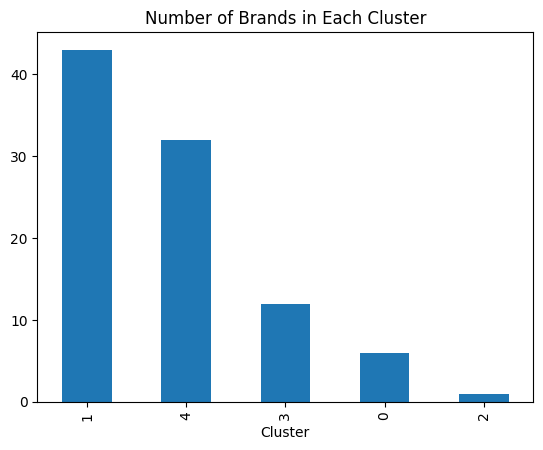

In [75]:
x_tf[['Brand', 'Cluster']]["Cluster"].value_counts().plot(kind='bar', title='Number of Brands in Each Cluster')

Investigate the choices of the clusters

FROM CLUSTER 4

In [338]:
print(get_dict_data("NIKE"))
print(get_dict_data("NEW BALANCE"))

            Country Value
193        Slovakia   100
44            Chile    52
180         Romania    52
86           Greece    51
236  United Kingdom    50
176          Poland    49
154     Netherlands    49
197    South Africa    46
106         Ireland    45
58          Czechia    43
            Country Value
154     Netherlands   100
178     Puerto Rico    80
60          Denmark    77
76           France    76
236  United Kingdom    75
177        Portugal    74
106         Ireland    74
237   United States    62
86           Greece    58
12        Australia    58


FROM CLUSTER 0

In [334]:
get_dict_data("ADIDAS")

Country Value
9      Argentina   100
44         Chile    95
177     Portugal    94
173         Peru    85
201        Spain    82
154  Netherlands    79
60       Denmark    78
176       Poland    77
83       Germany    75
86        Greece    73

### Analysis of Clusters with Associated Brands:

Here’s an updated business perspective that includes the specific brands in each cluster:

---

### **Cluster 0**  
**Top Google Trends Countries:**  
Chile, Romania, Argentina, Portugal, Italy, Spain, Germany, Poland, South Africa, Netherlands.

**Brands:**  
- **PUMA**  
- **ADIDAS**  
- **OMEGA**  
- **RAY BAN**  
- **DIESEL**  

**Conclusions:**  
1. **Target Audience and Brand Positioning:**
   - These brands are well-known for **sporty, lifestyle, and casual fashion**.
   - They cater to mass-market consumers, emphasizing affordability, comfort, and style.
   - Countries like Chile and Argentina are growing markets for sports and lifestyle wear, reflecting consumer interest in accessible, global brands like PUMA and Adidas.
   
2. **Market Implications:**
   - The popularity of Ray-Ban and Omega suggests a mix of aspirational middle-class consumers who value brands with iconic status but are not exclusively luxury-focused.
   - The emphasis on global sports and streetwear trends explains why South Africa and Poland show interest in these brands.

---

### **Cluster 1**  
**Top Google Trends Countries:**  
Italy, Switzerland, Canada, US, Hong Kong, UK, Netherlands, Belgium, Croatia, Austria.

**Brands:**  
- **POLO RALPH LAUREN**, **UNIQLO**, **URBAN OUTFITTERS**, **ALDO**, **COLE HAAN**, **VALENTINO**,  
**CHOW TAI FOOK**, **BRUNELLO CUCINELLI**, **AMERICAN EAGLE OUTFITTERS**, **NINE WEST**, **AUDEMARS PIGUET**,  
**LULULEMON**, **G-STAR**, **ZALANDO**, **TOPSHOP**, **TIFFANY & CO.**, **C&A**, **FOOT LOCKER INC.**,  
**MACY'S**, **STEVE MADDEN**, **OLD NAVY**, **IWC SCHAFFHAUSEN**, **PRIMARK**, **MAX MARA**,  
**NET-A-PORTER**, **FOREVER 21**, **STUART WEITZMAN**, **SISLEY**, **LAO FENG XIANG**, **TOD'S**,  
**TORY BURCH**, **ELIE TAHARIE**, **JAEGER-LE COULTRE**, **ELIE SAAB**, **PATAGONIA**, **BOGNER**,  
**NEW LOOK**, **BREGUET**, **ESCADA**, **BANANA REPUBLIC**, **DESIGUAL**, **CAVALLI**, **TED BAKER**.

**Conclusions:**  
1. **Target Audience and Brand Positioning:**
   - These brands are a blend of **accessible luxury** (e.g., Tiffany & Co., Brunello Cucinelli) and **affordable fashion** (e.g., Uniqlo, Primark, C&A).
   - The cluster reflects countries with diverse socioeconomic classes, spanning from mid-market to upper-middle-class consumers.  

2. **Regional Dynamics:**  
   - Western European countries (UK, Belgium, Switzerland) and the US have diverse fashion preferences and disposable income to support both mid-range and premium brands.
   - Hong Kong and Italy serve as luxury retail hubs, while Canada, Croatia, and Austria bring strong interest in affordable and versatile brands.

3. **Business Opportunities:**  
   - Brands in this cluster should focus on **regional customization** while maintaining global appeal. For example, Uniqlo might emphasize functionality, while Tiffany & Co. should lean into exclusivity.

---

### **Cluster 3**  
**Top Google Trends Countries:**  
Singapore, UAE, Switzerland, UK, Hong Kong, Kuwait, France, Canada, Australia, Qatar.

**Brands:**  
- **PATEK PHILIPPE**, **CHANEL**, **DIOR**, **ROLEX**, **CARTIER**, **LEVI'S**, **NEXT**,  
**CHOPARD**, **DOLCE & GABBANA**, **FENDI**, **GAP**, **FOSSIL**, **TAG HEUER**.

**Conclusions:**  
1. **Target Audience and Brand Positioning:**
   - This cluster is heavily influenced by **luxury brands** like Chanel, Dior, and Rolex.
   - It reflects high-income countries or regions with strong demand for status-driven purchases (e.g., Qatar, UAE, Singapore).

2. **Market Implications:**  
   - Middle Eastern countries (UAE, Qatar) value exclusivity and luxury as a status symbol, while Hong Kong and Singapore act as key luxury retail hubs in Asia.  
   - Levi's and Gap indicate demand for **premium casual wear** in Canada and Australia.

3. **Business Opportunities:**  
   - Brands should focus on **luxury marketing campaigns** and exclusivity to drive demand in affluent regions.  
   - Tailoring experiences (e.g., personalized services in luxury stores) is critical in attracting consumers in this cluster.

---

### **Cluster 4**  
**Top Google Trends Countries:**  
UK, Greece, Romania, Netherlands, Switzerland, Singapore, Italy, Ireland, Denmark, France.

**Brands:**  
- **NIKE**, **THE NORTH FACE**, **LOUIS VUITTON**, **BURBERRY**, **OAKLEY**, **JIMMY CHOO**,  
**SWAROVSKI**, **MICHAEL KORS**, **SKECHERS**, **MONCLER**, **TISSOT**, **VACHERON CONSTANTIN**,  
**NEW BALANCE**, **ARMANI**, **HUGO BOSS**, **MANOLO BLAHNIK**, **GUCCI**, **VERA WANG**, **SALVATORE FERRAGAMO**, **LACOSTE**.

**Conclusions:**  
1. **Target Audience and Brand Positioning:**
   - This cluster showcases a blend of **luxury fashion** (Louis Vuitton, Gucci, Burberry) and **functional, sporty brands** (Nike, New Balance, The North Face).
   - Countries like Greece and Romania indicate demand for **accessible premium products**, while Singapore and Switzerland prefer **true luxury fashion**.

2. **Market Implications:**  
   - Countries like the UK, Netherlands, and France are trendsetters, influencing global fashion trends.
   - Italy’s inclusion reflects its deep-rooted connection to luxury and craftsmanship.

3. **Business Opportunities:**  
   - Brands can focus on **cultural storytelling** to resonate with diverse audiences. For example, Louis Vuitton and Gucci can emphasize heritage, while Nike could highlight performance and sustainability.

---

### General Observations:
- **Cultural Proximity:**  
  European countries dominate Clusters 1 and 4, reflecting shared preferences for accessible luxury and trendy, functional fashion.
- **Economic Variability:**  
  High-income countries gravitate toward luxury clusters (3, 4), while mid-income regions dominate Cluster 0.
- **Brand Tiering:**  
  Clusters effectively segment brands into tiers (e.g., affordable, premium, and luxury), suggesting consumer preferences are highly stratified.

Would you like me to create additional visualizations or summarize these findings further?

The separation of **Adidas**, **Nike**, and **New Balance** into different clusters, despite all being sportswear brands, can be explained by differences in their **regional popularity**, **brand identity**, and **consumer perception**. Here's a deeper dive into why this separation occurs:

---

### **1. Geographic Popularity**  
- **Adidas**:  
  - Dominates in **Argentina**, **Chile**, and **Peru** – markets in South America where Adidas has been historically associated with soccer (football), a sport deeply rooted in these cultures.  
  - Its presence in **Spain** and **Netherlands** is also tied to soccer partnerships and sponsorships with major teams and players.
  - Focuses on fashion-forward streetwear collections, blending **sportswear with lifestyle fashion**.  

- **Nike**:  
  - Popular in **Slovakia**, **Chile**, and **Romania**, indicating its **global reach** but stronger positioning in countries with growing interest in performance-driven sportswear, such as basketball and running.
  - Its presence in **Greece**, **UK**, and **Poland** reflects Nike’s dominance in countries with a balanced demand for performance sportswear and athleisure trends.
  - Nike's marketing campaigns emphasize innovation, performance, and inspirational storytelling, resonating with **aspirational consumers** globally.

- **New Balance**:  
  - Strong in **Netherlands**, **Denmark**, and **France**, where **retro-inspired sneakers** and **minimalist designs** have gained a cult following.  
  - Unlike Adidas and Nike, New Balance markets itself as a niche brand appealing to fashion-conscious and **individualistic consumers**, particularly in Europe.  
  - Popularity in **Portugal** and **UK** suggests a rising preference for its blend of comfort and classic aesthetics.

---

### **2. Brand Identity and Strategy**
- **Adidas**:  
  - Positioned as a **global leader in soccer** and a fashion-forward brand.  
  - Its collaboration with celebrities like Kanye West (Yeezy) and focus on limited-edition sneakers positions Adidas as both **sporty and stylish**, targeting younger, urban consumers.  
  - The association with South America reflects Adidas’s leadership in soccer-centric markets and lifestyle apparel that blends culture and sport.

- **Nike**:  
  - Dominates the **performance and innovation** narrative, focusing on cutting-edge technologies like Flyknit and Air Max.  
  - Has broader appeal globally due to strong marketing campaigns featuring inspirational athletes and cultural moments (e.g., "Just Do It").
  - More aligned with **performance-driven sports** like basketball, running, and gym culture compared to Adidas's soccer-oriented focus.

- **New Balance**:  
  - Markets itself as a **heritage brand** with a focus on premium craftsmanship and functionality.  
  - Its separation from Nike and Adidas stems from its **targeting of a niche audience**, emphasizing **comfort and timeless design** over flashy marketing or celebrity endorsements.  
  - In Europe, it caters to an audience looking for **understated, retro-inspired fashion**.

---

### **3. Consumer Perception**
- **Adidas**:  
  - Viewed as **youthful, trendy, and versatile**, appealing equally to athletes and streetwear enthusiasts.  
  - In South America and Spain, the perception of Adidas as a soccer brand contributes heavily to its popularity.  

- **Nike**:  
  - Perceived as **cutting-edge, aspirational, and performance-oriented**.  
  - Its global reach and alignment with elite athletes make it the go-to brand for consumers who prioritize functionality and achievement.

- **New Balance**:  
  - Perceived as a **stylish yet practical brand**, especially in Europe.  
  - Its retro sneakers are seen as an alternative to the mainstream, favored by consumers seeking individuality over mass appeal.

---

### **4. Regional Marketing and Sponsorships**
- **Adidas**:  
  - Heavy investments in soccer sponsorships (e.g., FIFA World Cup, UEFA Champions League) resonate deeply in soccer-centric regions like **South America** and **Europe**.
  - Collaborations with cultural icons, particularly in fashion and music, create strong appeal in urban markets.  

- **Nike**:  
  - Focuses on a **diverse range of sports**, including basketball, running, and fitness.  
  - Sponsorship of top-tier athletes (e.g., LeBron James, Serena Williams) drives its appeal across various countries and demographics.  

- **New Balance**:  
  - Targets niche markets and has limited global marketing compared to Adidas and Nike.  
  - Collaborations with fashion brands (e.g., J.Crew, Aimé Leon Dore) help it stand out in **Europe**, particularly in regions favoring subtle, sophisticated sneakers.

---

### **Summary of Separation**
- **Cluster 0 (Adidas)**:  
  Adidas’s popularity in **South America** and **soccer-oriented regions** reflects its **deep cultural association with soccer** and streetwear.  

- **Cluster 4 (Nike & New Balance)**:  
  While Nike leads with **performance-focused innovation**, New Balance thrives in **niche, fashion-conscious markets**. Both appeal to **affluent markets** in Europe and North America but have distinct brand identities.

Would you like further insights into their business strategies or other aspects of the clustering?

The separation of brands like **Dior**, **Armani**, **Salvatore Ferragamo**, and **Dolce & Gabbana (D&G)** into one cluster and brands like **Chanel**, **Burberry**, **Victoria's Secret**, and **Prada** into another cluster reflects **differences in brand positioning, regional appeal, and consumer perceptions**. Let’s break this down:

---

### **Cluster with Dior, Armani, Salvatore Ferragamo, D&G**
1. **Key Characteristics of These Brands**:
   - **High-end luxury fashion with regional diversification**:  
     These brands are focused on **classic European luxury**, emphasizing elegance and timeless style rather than avant-garde or modern trends.
   - **Appeal to traditional luxury consumers**:  
     Their target audience includes **older, established consumers** who value craftsmanship and sophistication over trend-driven fashion.  
     - **Armani**: Known for minimalist, tailored designs and a strong presence in formal wear.  
     - **Salvatore Ferragamo**: Emphasizes heritage craftsmanship, particularly in leather goods and footwear.  
     - **Dior**: Balances between haute couture and ready-to-wear collections with traditional luxury appeal.  
     - **D&G**: Strongly tied to Italian heritage, with bold, vibrant designs rooted in Mediterranean culture.  

2. **Regional Popularity**:
   - These brands are more dominant in markets where **classical European luxury** is highly valued, including **Italy, France, Switzerland, and the UK**.  
   - For instance, **Dior** and **Armani** enjoy strong appeal in Europe and Asia due to their association with timeless luxury.

3. **Marketing and Branding Strategy**:
   - These brands tend to focus on **exclusive experiences**, including **haute couture shows**, rather than mass-market appeal.  
   - Their marketing campaigns emphasize **heritage, elegance, and craftsmanship**, which resonates more with traditional luxury markets.

---

### **Cluster with Chanel, Burberry, Victoria’s Secret, and Prada**
1. **Key Characteristics of These Brands**:
   - **Trendy and modern luxury with broader appeal**:  
     These brands have a more **fashion-forward, innovative approach**, often merging luxury with elements of pop culture or accessible luxury.  
     - **Chanel**: Balances traditional haute couture with younger, trend-driven consumers through handbags, perfumes, and makeup lines.  
     - **Burberry**: Has successfully transitioned into a **modern luxury brand**, moving away from its heritage trench coats to appeal to younger demographics.  
     - **Victoria's Secret**: Though not traditional luxury, its inclusion here suggests its focus on **lifestyle branding** and aspirational marketing, targeting millennials and Gen Z.  
     - **Prada**: A mix of avant-garde designs and quirky luxury, appealing to a younger, fashion-conscious audience.

2. **Regional Popularity**:
   - These brands have stronger appeal in regions where **modern luxury and lifestyle branding** resonate:  
     - **UK, France, UAE, Qatar, Singapore, and Hong Kong** are examples of markets with consumers seeking **trendy and contemporary luxury**.  
     - **Chanel** and **Burberry** dominate in cosmopolitan cities due to their broad product range, while **Prada** appeals to more experimental markets.

3. **Marketing and Branding Strategy**:
   - These brands invest heavily in **celebrity endorsements, runway shows, and social media campaigns**, making them more appealing to younger, fashion-conscious consumers.  
   - Their collections are often bold and experimental, drawing in consumers who value **creative expression** in their luxury purchases.

---

### **Key Factors Behind Separation**
1. **Consumer Targeting**:
   - **Dior, Armani, Salvatore Ferragamo, and D&G** focus on **classic, high-end luxury**, appealing to wealthier and more traditional buyers who prioritize heritage and timelessness.  
   - **Chanel, Burberry, Victoria’s Secret, and Prada** focus on **modern luxury and inclusivity**, appealing to **younger, trendier, and more diverse audiences**.

2. **Product and Style Differences**:
   - **Dior, Armani, Salvatore Ferragamo, and D&G**:  
     - Strong emphasis on **formal wear, tailored clothing, and timeless luxury goods**.  
     - Bold designs (e.g., **D&G**) are still rooted in **heritage aesthetics**.  

   - **Chanel, Burberry, Victoria’s Secret, and Prada**:  
     - Focus on blending **luxury with functionality and trend-driven design**.  
     - Strongly appeal to younger, urban consumers through their **ready-to-wear collections, accessories, and perfumes**.

3. **Geographical Reach**:
   - **Dior, Armani, Salvatore Ferragamo, and D&G**: Dominate in **European and Asian markets**, where the focus is on **luxury heritage and craftsmanship**.  
   - **Chanel, Burberry, Victoria’s Secret, and Prada**: Stronger in **urban, cosmopolitan cities**, with an emphasis on modern, accessible luxury.

4. **Brand Accessibility**:
   - **Chanel, Burberry, and Prada** are **more approachable in terms of product range**, with widely available accessories like bags, perfumes, and cosmetics.  
   - **Dior, Armani, and Ferragamo** maintain exclusivity in their offerings, limiting their presence to traditional luxury markets.

---

### **Business Perspective**
- **Cluster with Dior, Armani, Salvatore Ferragamo, and D&G**:  
  These brands cater to **affluent, traditional luxury consumers** who prioritize exclusivity and heritage.  
  - They thrive in markets where consumers value **long-term brand loyalty** and **classic designs**.  
  - Their market strategies emphasize **luxury craftsmanship, limited editions, and heritage branding**.

- **Cluster with Chanel, Burberry, Victoria’s Secret, and Prada**:  
  These brands are **more dynamic and adaptable**, attracting **younger and trendier consumers**.  
  - They cater to a broader demographic and often focus on regions where **modern luxury lifestyles** are highly sought after.  
  - These brands thrive on **innovation, accessibility, and global marketing**.  

---

Would you like insights into other brand clusters or further analysis?

## TF - IDF

In [76]:
df_top

Brand  Afghanistan  Albania  Algeria  American Samoa  Andorra  \
0                NIKE            0        0       11               0        0   
1   POLO RALPH LAUREN            0        0        0               0        0   
2      THE NORTH FACE            0        0        0               0        0   
3       LOUIS VUITTON            0        0       23               0        0   
4              UNIQLO            0        0        0               0        0   
..                ...          ...      ...      ...             ...      ...   
89          TAG HEUER            0        0        0               0        0   
90    BANANA REPUBLIC            0        0        0               0        0   
91           DESIGUAL            0        0        0               0        0   
92            CAVALLI            0       23        2               0        0   
93          TED BAKER            0        0        0               0        0   

    Angola  Anguilla  Antarctica  Antigua & Barbuda  ...  Yemen  Zambia  \
0        0         0           0                  0  ...      0       0   
1        0         0           0                  0  ...      0       0   
2        0         0           0                  0  ...      0       0   
3        0         0           0                  0  ...      0       0   
4        0         0           0                  0  ...      0       0   
..     ...       ...         ...                ...  ...    ...     ...   
89       0         0           0                  0  ...      0       0   
90       0         0           0                  0  ...      0       0   
91       0         0           0                  0  ...      0       0   
92       0         0           0                  0  ...      0       0   
93       0         0           0                  0  ...      0       0   

    Zimbabwe  Åland Islands  2023 Brand Value in $  \
0          0              0                 $42.5B   
1          0              0                  $4.7B   
2          0              0                  $4.6B   
3          0              0                 $36.4B   
4          0              0                  $9.4B   
..       ...            ...                    ...   
89         0              0                  $645M   
90         0              0                  $640M   
91         0              0                  $627M   
92         0              0                  $622M   
93         0              0                  $100M   

                                             Products  \
0                                      ['Sportswear']   
1   ['Accessories', 'Bags', 'Eyewear', 'Footwear',...   
2           ['Womenswear', 'Menswear', 'Accessories']   
3           ['Womenswear', 'Menswear', 'Accessories']   
4                                                 NaN   
..                                                ...   
89                                                NaN   
90  ['Womenswear', 'Menswear', 'Kidswear', 'Footwe...   
91  ['Womenswear', 'Menswear', 'Kidswear', 'Sports...   
92  ['Womenswear', 'Menswear', 'Kidswear', 'Footwe...   
93  ['Accessories', 'Bags', 'Eyewear', 'Jewelry', ...   

                                          Description  \
0   Our mission is what drives us to do everything...   
1   Ralph Lauren is a US-based designer and retail...   
2   Founded by husband and wife Douglas and Susie ...   
3   LOUIS VUITTON ist seit über 160 Jahren eine de...   
4   Uniqlo is a modern Japanese company that inspi...   
..                                                ...   
89  TAG Heuer is a watch company founded in 1860 b...   
90  Banana Republic is a clothing and accessories ...   
91  Thomas Meyer created Desigual in 1984, in the ...   
92  Founded in 1970, Roberto Cavalli is an Italian...   
93  Ted Baker is a British designer and retailer o...   

                            Website  \
0                   http://nike.com   
1   https://www.poloralphlauren.com   
2     

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [78]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df_top['Description_processed'])

In [79]:
# Choose number of clusters
k = 15

# Initialize and fit K-Means
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# Add cluster labels to the DataFrame
df_top['cluster_TFIDF'] = kmeans.labels_

In [80]:
df_top

Brand  Afghanistan  Albania  Algeria  American Samoa  Andorra  \
0                NIKE            0        0       11               0        0   
1   POLO RALPH LAUREN            0        0        0               0        0   
2      THE NORTH FACE            0        0        0               0        0   
3       LOUIS VUITTON            0        0       23               0        0   
4              UNIQLO            0        0        0               0        0   
..                ...          ...      ...      ...             ...      ...   
89          TAG HEUER            0        0        0               0        0   
90    BANANA REPUBLIC            0        0        0               0        0   
91           DESIGUAL            0        0        0               0        0   
92            CAVALLI            0       23        2               0        0   
93          TED BAKER            0        0        0               0        0   

    Angola  Anguilla  Antarctica  Antigua & Barbuda  ...  Zambia  Zimbabwe  \
0        0         0           0                  0  ...       0         0   
1        0         0           0                  0  ...       0         0   
2        0         0           0                  0  ...       0         0   
3        0         0           0                  0  ...       0         0   
4        0         0           0                  0  ...       0         0   
..     ...       ...         ...                ...  ...     ...       ...   
89       0         0           0                  0  ...       0         0   
90       0         0           0                  0  ...       0         0   
91       0         0           0                  0  ...       0         0   
92       0         0           0                  0  ...       0         0   
93       0         0           0                  0  ...       0         0   

    Åland Islands  2023 Brand Value in $  \
0               0                 $42.5B   
1               0                  $4.7B   
2               0                  $4.6B   
3               0                 $36.4B   
4               0                  $9.4B   
..            ...                    ...   
89              0                  $645M   
90              0                  $640M   
91              0                  $627M   
92              0                  $622M   
93              0                  $100M   

                                             Products  \
0                                      ['Sportswear']   
1   ['Accessories', 'Bags', 'Eyewear', 'Footwear',...   
2           ['Womenswear', 'Menswear', 'Accessories']   
3           ['Womenswear', 'Menswear', 'Accessories']   
4                                                 NaN   
..                                                ...   
89                                                NaN   
90  ['Womenswear', 'Menswear', 'Kidswear', 'Footwe...   
91  ['Womenswear', 'Menswear', 'Kidswear', 'Sports...   
92  ['Womenswear', 'Menswear', 'Kidswear', 'Footwe...   
93  ['Accessories', 'Bags', 'Eyewear', 'Jewelry', ...   

                                          Description  \
0   Our mission is what drives us to do everything...   
1   Ralph Lauren is a US-based designer and retail...   
2   Founded by husband and wife Douglas and Susie ...   
3   LOUIS VUITTON ist seit über 160 Jahren eine de...   
4   Uniqlo is a modern Japanese company that inspi...   
..                                                ...   
89  TAG Heuer is a watch company founded in 1860 b...   
90  Banana Republic is a clothing and accessories ...   
91  Thomas Meyer created Desigual in 1984, in the ...   
92  Founded in 1970, Roberto Cavalli is an Italian...   
93  Ted Baker is a British designer and retailer o...   

                            Website  \
0                   http://nike.com   
1   https://www.poloralphlauren.com   
2      https://www.thenorthface.com   
3       http://www.louisvuitton.com   
4           

In [81]:
score = silhouette_score(X, kmeans.labels_)
print(f'Silhouette Score: {score:.2f}')

Silhouette Score: 0.00


<Axes: title={'center': 'Number of Brands in Each Cluster'}, xlabel='cluster_TFIDF'>

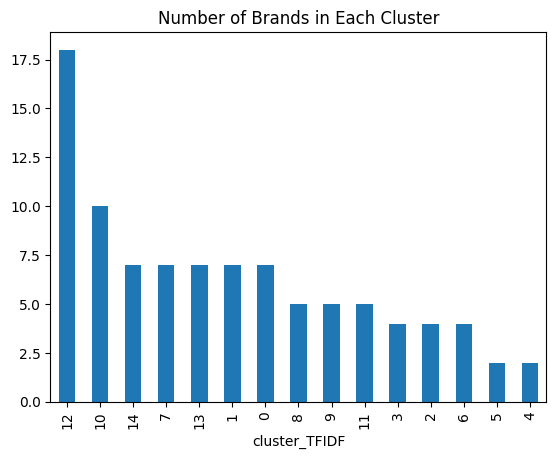

In [82]:
df_top['cluster_TFIDF'].value_counts().plot(kind='bar', title='Number of Brands in Each Cluster')

In [83]:
list(df_top[df_top['cluster_TFIDF'] == 0].Brand)

['PUMA',
 'LULULEMON',
 'ADIDAS',
 'UNDER ARMOUR',
 'ASICS',
 'ELIE TAHARIE',
 'BOGNER']

In [84]:
list(df_top[df_top['cluster_TFIDF'] == 1].Brand)

['ALDO', 'MONCLER', 'LACOSTE', 'H&M', 'FENDI', 'FURLA', "TOD'S"]

In [85]:
list(df_top[df_top['cluster_TFIDF'] == 2].Brand)

['COACH', 'DIOR', 'STEVE MADDEN', 'LONGCHAMP']

In [86]:
list(df_top[df_top['cluster_TFIDF'] == 3].Brand)

['POLO RALPH LAUREN', 'VERA WANG', 'SALVATORE FERRAGAMO', 'TORY BURCH']

In [87]:
list(df_top[df_top['cluster_TFIDF'] == 4].Brand)

['HUGO BOSS', 'ESCADA']

In [88]:
list(df_top[df_top['cluster_TFIDF'] == 5].Brand)

['PATEK PHILIPPE', 'MANOLO BLAHNIK']

In [89]:
list(df_top[df_top['cluster_TFIDF'] == 6].Brand)

['COLE HAAN', 'SWAROVSKI', 'TIFFANY & CO.', 'BANANA REPUBLIC']

In [90]:
list(df_top[df_top['cluster_TFIDF'] == 7].Brand)

['UNIQLO',
 'JIMMY CHOO',
 'BRUNELLO CUCINELLI',
 'TOM FORD',
 'CALVIN KLEIN',
 'SISLEY',
 'CAVALLI']

In [91]:
list(df_top[df_top['cluster_TFIDF'] == 8].Brand)

['URBAN OUTFITTERS',
 'AMERICAN EAGLE OUTFITTERS',
 'ZALANDO',
 'PRADA',
 'OLD NAVY']

In [92]:
dict_tf_idf = {}

for i in df_top['cluster_TFIDF'].unique():
    dict_tf_idf[i] = list(df_top[df_top['cluster_TFIDF'] == i].Brand)

In [93]:
# get random values from list
import random
def get_random_brands(cluster_id, cluster):
    # Ensure the cluster has enough items to sample from
    if cluster_id not in cluster or not cluster[cluster_id]:
        return []  # Return an empty list if the cluster is invalid or empty
    
    # Determine the sample size: minimum 1, maximum 20, or limited by cluster size
    sample_size = random.randint(1, min(20, len(cluster[cluster_id])))
    
    # Sample random brands
    return random.sample(cluster[cluster_id], sample_size)

def find_brand(target_string, cluster):
    for k,v in cluster.items():
        lowered = [i.lower() for i in v]
        if target_string in lowered:
            brands = get_random_brands(k, cluster)
            print(f"Cluster {k}: {brands}")

In [94]:
find_brand("nike", dict_tf_idf)

Cluster 14: ['CARTIER', 'FOOT LOCKER INC.', 'OAKLEY', 'GAP', 'THE NORTH FACE']


In [95]:
dict_tf_idf[14]

['NIKE',
 'THE NORTH FACE',
 'OAKLEY',
 'NEW BALANCE',
 'CARTIER',
 'FOOT LOCKER INC.',
 'GAP']

In [96]:
find_brand("nike", dict_tf_idf)

Cluster 14: ['THE NORTH FACE', 'NIKE']


## Using BERT

In [195]:
from transformers import BertTokenizer, BertModel
import torch


In [196]:
# Load the pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

In [197]:
def get_embeddings(texts):
    # Tokenize the text
    inputs = tokenizer(texts, padding=True, truncation=True, return_tensors='pt')

    # Get the output embeddings (use the last hidden state of BERT)
    with torch.no_grad():
        outputs = model(**inputs)
    
    # Take the mean of the last hidden states (this gives us sentence embeddings)
    embeddings = outputs.last_hidden_state.mean(dim=1).cpu().numpy()
    return embeddings

In [198]:
embeddings = get_embeddings(df_top["Description"].tolist())

In [205]:
# Deci
#de number of clusters (k)
k = 15

# Fit K-Means on the embeddings
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(embeddings)

# Get the cluster labels for each description
clusters = kmeans.labels_


In [206]:
df_top['cluster_BERT'] = clusters

<Axes: title={'center': 'Number of Brands in Each Cluster'}, xlabel='cluster_BERT'>

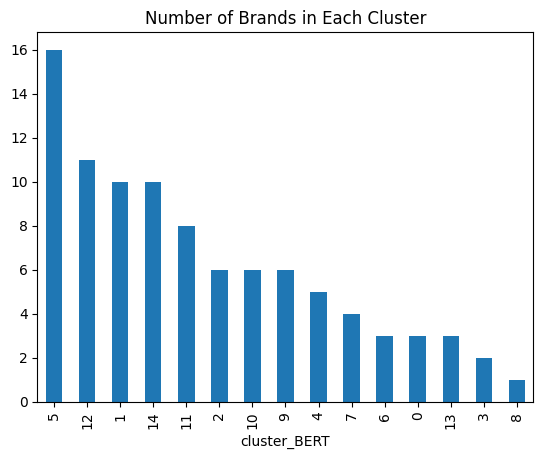

In [217]:
df_top["cluster_BERT"].value_counts().plot(kind='bar', title='Number of Brands in Each Cluster')

In [207]:
dict_tf_BERT = {}

for i in df_top['cluster_BERT'].unique():
    dict_tf_BERT[i] = list(df_top[df_top['cluster_BERT'] == i].Brand)

In [211]:
print("FOR BERT ", find_brand("nike", dict_tf_BERT))
print("FOR TF IDF ", find_brand("nike", dict_tf_idf))

Cluster 11: ['STUART WEITZMAN', 'PUMA', 'TOPSHOP', 'FOOT LOCKER INC.', 'SKECHERS', 'FOSSIL', 'NEW BALANCE', 'NIKE']
FOR BERT  None
Cluster 14: ['OAKLEY', 'GAP', 'NEW BALANCE', 'FOOT LOCKER INC.', 'CARTIER']
FOR TF IDF  None


In [212]:
print("FOR BERT ", find_brand("dior", dict_tf_BERT))
print("FOR TF IDF ", find_brand("dior", dict_tf_idf))

Cluster 10: ['CAVALLI', 'HUGO BOSS', 'DIOR', 'FURLA', 'VALENTINO', 'JAEGER-LE COULTRE']
FOR BERT  None
Cluster 2: ['DIOR', 'STEVE MADDEN', 'COACH']
FOR TF IDF  None


In [215]:
print("FOR BERT ", find_brand("the north face", dict_tf_BERT))
print("FOR TF IDF ", find_brand("the north face", dict_tf_idf))

Cluster 1: ['COACH', 'TED BAKER', 'FENDI', 'THE NORTH FACE', 'CHRISTIAN LOUBOUTIN', 'G-STAR', 'CALVIN KLEIN']
FOR BERT  None
Cluster 14: ['GAP', 'THE NORTH FACE']
FOR TF IDF  None


In [216]:
print("FOR BERT ", find_brand("patagonia", dict_tf_BERT))
print("FOR TF IDF ", find_brand("patagonia", dict_tf_idf))

Cluster 5: ['AMERICAN EAGLE OUTFITTERS']
FOR BERT  None
Cluster 13: ['BURBERRY', 'SKECHERS', 'PATAGONIA', 'DESIGUAL', 'CHANEL', 'NEXT']
FOR TF IDF  None


In [219]:
print("FOR BERT ", find_brand("uniqlo", dict_tf_BERT))
print("FOR TF IDF ", find_brand("uniqlo", dict_tf_idf))

Cluster 2: ['FOREVER 21', "MACY'S", 'NEW LOOK', 'NINE WEST', 'CHOW TAI FOOK']
FOR BERT  None
Cluster 7: ['UNIQLO', 'CALVIN KLEIN', 'BRUNELLO CUCINELLI', 'JIMMY CHOO', 'CAVALLI']
FOR TF IDF  None


In [ ]:
print("FOR BERT ", find_brand("uniqlo", dict_tf_BERT))
print("FOR TF IDF ", find_brand("uniqlo", dict_tf_idf))

In [235]:
print("FOR BERT ", find_brand("h&m", dict_tf_BERT))
print("FOR TF IDF ", find_brand("h&m", dict_tf_idf))

dict_tf_idf[8]

Cluster 14: ['CHOPARD', 'ROLEX', 'PRIMARK', 'PATEK PHILIPPE', "TOD'S", 'TAG HEUER', 'AUDEMARS PIGUET', 'H&M', 'SWAROVSKI']
FOR BERT  None
Cluster 1: ['FENDI', 'ALDO', 'H&M', 'FURLA', "TOD'S"]
FOR TF IDF  None


['URBAN OUTFITTERS',
 'AMERICAN EAGLE OUTFITTERS',
 'ZALANDO',
 'PRADA',
 'OLD NAVY']

In [221]:
list(df_top.Brand)

['NIKE',
 'POLO RALPH LAUREN',
 'THE NORTH FACE',
 'LOUIS VUITTON',
 'UNIQLO',
 'COACH',
 'BURBERRY',
 'URBAN OUTFITTERS',
 'ALDO',
 'OAKLEY',
 'COLE HAAN',
 'JIMMY CHOO',
 'VALENTINO',
 'CHOW TAI FOOK',
 'SWAROVSKI',
 'MICHAEL KORS',
 'SKECHERS',
 'MONCLER',
 'PUMA',
 'BRUNELLO CUCINELLI',
 'AMERICAN EAGLE OUTFITTERS',
 'NINE WEST',
 'AUDEMARS PIGUET',
 'TISSOT',
 'VACHERON CONSTANTIN',
 'NEW BALANCE',
 'LULULEMON',
 'PATEK PHILIPPE',
 'ARMANI',
 'HUGO BOSS',
 'MANOLO BLAHNIK',
 'G-STAR',
 'CHANEL',
 'GUCCI',
 'DIOR',
 'ADIDAS',
 'ROLEX',
 'ZALANDO',
 'VERA WANG',
 'TOPSHOP',
 'SALVATORE FERRAGAMO',
 'LACOSTE',
 'H&M',
 'CARTIER',
 'PRADA',
 'TIFFANY & CO.',
 'TOM FORD',
 "LEVI'S",
 "VICTORIA'S SECRET",
 'NEXT',
 'UNDER ARMOUR',
 'C&A',
 'CHOPARD',
 'DOLCE & GABBANA',
 'CHRISTIAN LOUBOUTIN',
 'OMEGA',
 'FOOT LOCKER INC.',
 'RAY BAN',
 "MACY'S",
 'ASICS',
 'STEVE MADDEN',
 'FENDI',
 'OLD NAVY',
 'IWC SCHAFFHAUSEN',
 'PRIMARK',
 'MAX MARA',
 'DIESEL',
 'CALVIN KLEIN',
 'NET-A-PORTER',
 

In [489]:
groupedBert = df_top.groupby('cluster_BERT').sum()

In [490]:
groupedBert[groupedBert["Brand"] == groupedBert.loc[0].Brand].iloc[0].drop(["KMeans_Cluster", "Description_processed", "cluster_TFIDF", "Description_combined"])

Brand                         LOUIS VUITTONADIDASZALANDONET-A-PORTERBOGNER
Afghanistan                                                              0
Albania                                                                  0
Algeria                                                                 37
American Samoa                                                           0
                                               ...                        
Åland Islands                                                            0
2023 Brand Value in $                          $36.4B$16.1B$4.9B$1.5B$711M
Products                 ['Womenswear', 'Menswear', 'Accessories']['Spo...
Description              LOUIS VUITTON ist seit über 160 Jahren eine de...
Website                  http://www.louisvuitton.comhttp://www.adidas-g...
Name: 0, Length: 255, dtype: object

In [456]:
list(get_dict_data(groupedBert[groupedBert["Brand"] == groupedBert.loc[0].Brand].iloc[0].drop(["KMeans_Cluster", "Description_processed", "cluster_TFIDF", "Description_combined"]))["Country"])

['Switzerland',
 'Germany',
 'Austria',
 'Denmark',
 'Belgium',
 'Croatia',
 'Netherlands',
 'Italy',
 'France',
 'Norway']

In [457]:
list(get_dict_data(groupedBert[groupedBert["Brand"] == groupedBert.loc[1].Brand].iloc[0].drop(["KMeans_Cluster", "Description_processed", "cluster_TFIDF", "Description_combined"]))["Country"])

['Italy',
 'United Kingdom',
 'France',
 'South Africa',
 'Romania',
 'Netherlands',
 'Ireland',
 'Portugal',
 'Greece',
 'United Arab Emirates']

In [458]:
list(get_dict_data(groupedBert[groupedBert["Brand"] == groupedBert.loc[2].Brand].iloc[0].drop(["KMeans_Cluster", "Description_processed", "cluster_TFIDF", "Description_combined"]))["Country"])

['Hong Kong',
 'Singapore',
 'United States',
 'Italy',
 'United Kingdom',
 'United Arab Emirates',
 'Australia',
 'Greece',
 'Canada',
 'Ireland']

In [460]:
list(get_dict_data(groupedBert[groupedBert["Brand"] == groupedBert.loc[3].Brand].iloc[0].drop(["KMeans_Cluster", "Description_processed", "cluster_TFIDF", "Description_combined"]))["Country"])

['United States',
 'Ireland',
 'United Kingdom',
 'Portugal',
 'Canada',
 'Australia',
 'Singapore',
 'Hong Kong',
 'Italy',
 'Netherlands']

In [461]:
list(get_dict_data(groupedBert[groupedBert["Brand"] == groupedBert.loc[4].Brand].iloc[0].drop(["KMeans_Cluster", "Description_processed", "cluster_TFIDF", "Description_combined"]))["Country"])

['Italy',
 'Canada',
 'United Kingdom',
 'Netherlands',
 'Greece',
 'Ireland',
 'Albania',
 'Belgium',
 'Croatia',
 'Denmark']

In [465]:
df_top.drop("Description_combined", axis=1)

Brand  Afghanistan  Albania  Algeria  American Samoa  Andorra  \
0                NIKE            0        0       11               0        0   
1   POLO RALPH LAUREN            0        0        0               0        0   
2      THE NORTH FACE            0        0        0               0        0   
3       LOUIS VUITTON            0        0       23               0        0   
4              UNIQLO            0        0        0               0        0   
..                ...          ...      ...      ...             ...      ...   
89          TAG HEUER            0        0        0               0        0   
90    BANANA REPUBLIC            0        0        0               0        0   
91           DESIGUAL            0        0        0               0        0   
92            CAVALLI            0       23        2               0        0   
93          TED BAKER            0        0        0               0        0   

    Angola  Anguilla  Antarctica  Antigua & Barbuda  ...  Zimbabwe  \
0        0         0           0                  0  ...         0   
1        0         0           0                  0  ...         0   
2        0         0           0                  0  ...         0   
3        0         0           0                  0  ...         0   
4        0         0           0                  0  ...         0   
..     ...       ...         ...                ...  ...       ...   
89       0         0           0                  0  ...         0   
90       0         0           0                  0  ...         0   
91       0         0           0                  0  ...         0   
92       0         0           0                  0  ...         0   
93       0         0           0                  0  ...         0   

    Åland Islands  2023 Brand Value in $  \
0               0                 $42.5B   
1               0                  $4.7B   
2               0                  $4.6B   
3               0                 $36.4B   
4               0                  $9.4B   
..            ...                    ...   
89              0                  $645M   
90              0                  $640M   
91              0                  $627M   
92              0                  $622M   
93              0                  $100M   

                                             Products  \
0                                      ['Sportswear']   
1   ['Accessories', 'Bags', 'Eyewear', 'Footwear',...   
2           ['Womenswear', 'Menswear', 'Accessories']   
3           ['Womenswear', 'Menswear', 'Accessories']   
4                                                 NaN   
..                                                ...   
89                                                NaN   
90  ['Womenswear', 'Menswear', 'Kidswear', 'Footwe...   
91  ['Womenswear', 'Menswear', 'Kidswear', 'Sports...   
92  ['Womenswear', 'Menswear', 'Kidswear', 'Footwe...   
93  ['Accessories', 'Bags', 'Eyewear', 'Jewelry', ...   

                                          Description  \
0   Our mission is what drives us to do everything...   
1   Ralph Lauren is a US-based designer and retail...   
2   Founded by husband and wife Douglas and Susie ...   
3   LOUIS VUITTON ist seit über 160 Jahren eine de...   
4   Uniqlo is a modern Japanese company that inspi...   
..                                                ...   
89  TAG Heuer is a watch company founded in 1860 b...   
90  Banana Republic is a clothing and accessories ...   
91  Thomas Meyer created Desigual in 1984, in the ...   
92  Founded in 1970, Roberto Cavalli is an Italian...   
93  Ted Baker is a British designer and retailer o...   

                            Website  KMeans_Cluster  \
0                   http://nike.com               4   
1   https://www.poloralphlauren.com               1   
2      https://www.thenorthface.com               4   
3       http://www.louisvuitton.com               4   
4            http://www.uniq

In [466]:
df_top.to_csv('exports/small_clustered.csv')

### Complete data

In [2]:
import pandas as pd
from sklearn.cluster import KMeans

In [2]:
english_df = pd.read_csv('data/EnglishScrapedData.csv')

In [9]:
english_df['Description_processed'] = english_df['Description'].str.replace(r'[^\w\s]', '').str.lower()
english_df['Description_processed'] = english_df['Description_processed'].apply(preprocess_text)

In [10]:
english_df_tf = TfidfVectorizer()
tf_idf_english_embeddings = english_df_tf.fit_transform(english_df['Description_processed'])

In [11]:
tf_idf_english_embeddings

<3500x26896 sparse matrix of type '<class 'numpy.float64'>'
	with 271045 stored elements in Compressed Sparse Row format>

In [12]:
# Choose number of clusters
k = 85

# Initialize and fit K-Means
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(tf_idf_english_embeddings)

# Add cluster labels to the DataFrame
english_df['cluster_TFIDF'] = kmeans.labels_

In [20]:
english_df

Brand Name                                           Products  \
0           0039 Italy                                     ['Womenswear']   
1            05 Studio                           ['Swimwear', 'Bodywear']   
2                 0711                                           ['Bags']   
3               10Days          ['Womenswear', 'Menswear', 'Accessories']   
4           11 Degrees  ['Womenswear', 'Menswear', 'Kidswear', 'Access...   
...                ...                                                ...   
3495         TAG Heuer                                                NaN   
3496  Blue Tomato GmbH                                                NaN   
3497            Armani                                                NaN   
3498            CHANEL                                                NaN   
3499             Prada                         ['Womenswear', 'Menswear']   

                                            Description  \
0     BRAND: 0039 Italy DESCRIPTION: When a German l...   
1     BRAND: 05 Studio DESCRIPTION: We do basics tha...   
2     BRAND: 0711 DESCRIPTION: Brand 0711 was founde...   
3     BRAND: 10Days DESCRIPTION: 10DAYS is an Amster...   
4     BRAND: 11 Degrees DESCRIPTION: Here at 11 Degr...   
...                                                 ...   
3495  BRAND: TAG Heuer DESCRIPTION: TAG Heuer is a w...   
3496  BRAND: Blue Tomato GmbH DESCRIPTION: Blue Toma...   
3497  BRAND: Armani DESCRIPTION: The Armani Group is...   
3498  BRAND: CHANEL DESCRIPTION: CHANEL is a private...   
3499  BRAND: Prada DESCRIPTION: The Prada Group is a...   

                             Website  \
0           http://www.0039italy.com   
1        https://www.the05studio.com   
2             http://0711tbilisi.com   
3     https://www.10dayslifestyle.nl   
4          https://www.11degrees.eu/   
...                              ...   
3495        http://www.tagheuer.com/   
3496                             NaN   
3497          http://www.armani.com/   
3498          http://www.chanel.com/   
3499            http://www.prada.com   

                                       Sentiment_Scores  Compound Sentiment  \
0     {'neg': 0.031, 'neu': 0.772, 'pos': 0.197, 'co...    0.9942  Positive   
1     {'neg': 0.021, 'neu': 0.799, 'pos': 0.18, 'com...    0.9599  Positive   
2     {'neg': 0.0, 'neu': 0.841, 'pos': 0.159, 'comp...    0.9914  Positive   
3     {'neg': 0.0, 'neu': 0.703, 'pos': 0.297, 'comp...    0.9964  Positive   
4     {'neg': 0.0, 'neu': 0.858, 'pos': 0.142, 'comp...    0.9042  Positive   
...                                                 ...       ...       ...   
3495  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000   Neutral   
3496  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000   Neutral   
3497  {'neg': 0.0, 'neu': 0.948, 'pos': 0.052, 'comp...    0.5187  Positive   
3498  {'neg': 0.0, 'neu': 0.852, 'pos': 0.148, 'comp...    0.9552  Positive   
3499  {'neg': 0.0, 'neu': 0.891, 'pos': 0.109, 'comp...    0.7351  Positive   

     Language                              Description_processed  \
0          en  brand: 0039 italy description: german label ma...   
1          en  brand: 05 studio description: basics boring! 0...   
2          en  brand: 0711 description: brand 0711 founded 20...   
3          en  brand: 10days description: 10days amsterdam ba...   
4          en  brand: 11 degrees description: 11 degrees use ...   
...       ...                                                ...   
3495       en  brand: tag heuer description: tag heuer watch ...   
3496       en  brand: blue tomato gmbh description: blue toma...   
3497       en  brand: armani description: armani group leadin...   
3498       en  brand: chanel description: chanel private comp...   
3499       en  brand: prada description: prada group global l...   

      cluster_TFIDF  
0                44  
1                14  
2                37  
3                25  
4                 1  

In [13]:
brands_for_cluster = {}
for i in english_df["cluster_TFIDF"].unique():
    brands_for_cluster[i] = [s.lower() for s in list(english_df[english_df["cluster_TFIDF"] == i]["Brand Name"])]

In [14]:
brands_for_cluster

{44: ['0039 italy',
  'adanti nederland',
  'afterlabel',
  'ahlvar gallery',
  'alto milano',
  'aristide',
  'asiana',
  'australian',
  'beatrice b',
  'bluebeery',
  'bsb',
  'cafènoir',
  'calpierre',
  'cero & etage',
  'chiccheria brand',
  'cinque',
  'claudio civitico',
  'comma,',
  'cosabella',
  'drumohr',
  'drykorn',
  'eleventy',
  'eroke',
  'family 1st',
  'fred mello',
  'g1920',
  'gardeur',
  'gas jeans',
  'grand frank',
  'heartkiss',
  'hellequino',
  'ingrosso italy',
  'japantky',
  'jeff',
  'killtec',
  'la sportiva',
  'lcf ledûb corporate fashion',
  'liebesglück',
  'luisa cerano',
  'mehran',
  'michèle',
  'milano italy',
  'montechiaro',
  'mrz',
  'norton',
  'olsen mode',
  'paola davoli',
  'pennyblack',
  'ragman',
  'rich & royal',
  "roberto d'angelo",
  'sem per lei.',
  'shelalove',
  'simclan',
  'smith & soul',
  'stokton',
  'studio italy',
  'suza',
  'thylie',
  'twinset',
  'via appia mode',
  'sisley'],
 14: ['05 studio',
  'âme antwerp',

In [32]:
# get random values from list
import random
def get_random_brands(cluster_id, cluster):
    # Ensure the cluster has enough items to sample from
    if cluster_id not in cluster or not cluster[cluster_id]:
        return []  # Return an empty list if the cluster is invalid or empty
    
    # Determine the sample size: minimum 1, maximum 20, or limited by cluster size
    sample_size = random.randint(1, min(20, len(cluster[cluster_id])))
    
    # Sample random brands
    return random.sample(cluster[cluster_id], sample_size)

In [35]:
def find_brand(target_string, cluster):
    for k,v in cluster.items():
        if target_string in v:
            brands = get_random_brands(k, cluster)
            print(f"Cluster {k}: {brands}")

In [17]:
find_brand("adidas")

Cluster 18: ['anerkjendt', 'odlo sports', 'flaxta', 'nixon', 'junior league', 'ilc', 'davida', 'triaction', 'nordbrandt', 'nost', 'dakine', 'kempa', 'puma', 'chiemsee', 'björn borg', 'mizuno', 'lafuma', 'daily sports']


In [18]:
brands_for_cluster[18]


['adidas',
 'anerkjendt',
 'arena',
 'asics',
 'bettina bensinger',
 'bidi badu',
 'björn borg',
 'canyon women sports',
 'chiemsee',
 'creenstone',
 'cruyff',
 'daily brat',
 'daily paper',
 'daily sports',
 'dakine',
 'davida',
 'deblon sports',
 'donnay',
 'dycteam',
 'ellesse',
 'fat moose',
 'flaxta',
 'geographical norway',
 'hi-tec sport',
 'ilc',
 'inov-8',
 'junior league',
 'kappa',
 'kempa',
 'lafuma',
 'limited sports',
 'mizuno',
 'na-kd',
 'nixon',
 'noa noa',
 'nordbrandt',
 'nost',
 'odlo sports',
 'puma',
 'röhnisch',
 'sinner',
 'steptronic',
 'triaction',
 'wellensteyn',
 'yarmouth oilskins',
 'zalando']

In [19]:
find_brand("blue tomato gmbh")

Cluster 64: ['blue nude', 'naim josefi', 'rh45', 'schott', 'van harper', 'florèz', 'elenco', 'herrlicher', 'alessandro zavetti', 'laundry industry', 'ikks france', 'charles colby', 'kujten', 'strenesse', 'blazoer', 'blue loop originals', 'carlo carrizosa']


In [20]:
brands_for_cluster[68]


['2xu',
 'ace sunglasses',
 'artsac',
 'at.p.co',
 'babista',
 'babymel',
 'billebeino',
 'blaumax',
 'boden',
 'briston watches',
 'candice cooper',
 'coccinelle',
 "co'couture",
 'co.exist',
 'colette schilde',
 'denizen®',
 'diamond supply co.',
 'dockers',
 'g. h. bass&co',
 'josephine & co',
 "levi's",
 'luisa vannini',
 'maaji',
 'malvi & co.',
 'maryan mehlhorn',
 'monterrain',
 'nove',
 'people of shibuya',
 'peregrine',
 'powderhorn',
 'rodier',
 'signature',
 'signature by levi strauss & co.',
 'stefford',
 'supply & demand',
 'tutti & co.',
 'ugg australia',
 'uyn']

<Axes: title={'center': 'Number of Brands in Each Cluster'}, xlabel='cluster_TFIDF'>

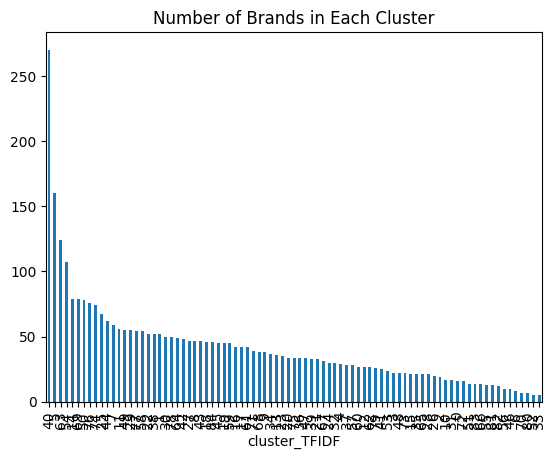

In [21]:
english_df.cluster_TFIDF.value_counts().plot(kind='bar', title='Number of Brands in Each Cluster')

### BERT Embeddings

In [97]:
from transformers import BertTokenizer, BertModel
import torch
import numpy as np

d:\programming\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [254]:
torch.__version__

'2.5.0+cu118'

In [255]:
# Check if CUDA is available and select the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [256]:
# Load the pre-trained BERT tokenizer and model
model_bigdata = BertModel.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model_bigdata = model_bigdata.to(device)

In [257]:
def get_embeddings(texts, batch_size=8):
    embeddings = []
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        inputs = tokenizer(batch, padding=True, truncation=True, return_tensors='pt')
        inputs = {key: value.to(device) for key, value in inputs.items()}
        
        with torch.no_grad():
            outputs = model_bigdata(**inputs)
        
        batch_embeddings = outputs.last_hidden_state.mean(dim=1).cpu().numpy()
        embeddings.append(batch_embeddings)
    
    return np.vstack(embeddings)  # Combine all batch embeddings

embeddings = get_embeddings(english_df["Description"].tolist())

In [19]:
np.save('embeddings.npy', embeddings)

In [317]:
# Deci
#de number of clusters (k)
k = 150

# Fit K-Means on the embeddings
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(embeddings)

# Get the cluster labels for each description
clusters = kmeans.labels_

english_df['cluster_BERT'] = clusters


In [318]:
brands_for_cluster_BERT = {}
for i in english_df["cluster_BERT"].unique():
    brands_for_cluster_BERT[i] = [s.lower() for s in list(english_df[english_df["cluster_BERT"] == i]["Brand Name"])]

<Axes: title={'center': 'Number of Brands in Each Cluster'}, xlabel='cluster_BERT'>

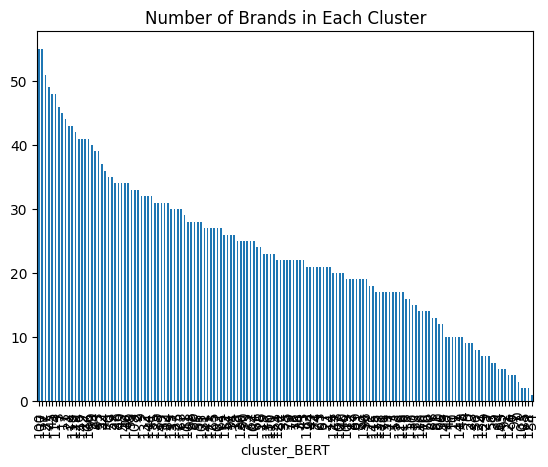

In [319]:
english_df.cluster_BERT.value_counts().plot(kind='bar', title='Number of Brands in Each Cluster')

In [320]:
print("FOR BERT ", find_brand("nike", dict_tf_BERT))
print("FOR TF IDF ", find_brand("nike", dict_tf_idf))

Cluster 11: ['STUART WEITZMAN', 'FOOT LOCKER INC.', 'NIKE', 'SKECHERS', 'PUMA']
FOR BERT  None
Cluster 14: ['FOOT LOCKER INC.', 'GAP', 'NIKE']
FOR TF IDF  None


In [323]:
find_brand("nike", brands_for_cluster_BERT)


Cluster 41: ['frankie4', 'black bananas', 'liars & lovers', 'difuzed', 'missguided', 'redmax sportswear', 'good american', 'wolf lingerie', 'ecco', 'white label project', 'flaxta']


In [324]:
print("FOR BERT ", find_brand("dior", dict_tf_BERT))
print("FOR TF IDF ", find_brand("dior", dict_tf_idf))

Cluster 10: ['HUGO BOSS']
FOR BERT  None
Cluster 2: ['STEVE MADDEN']
FOR TF IDF  None


In [325]:
find_brand("dior", brands_for_cluster_BERT)
brands_for_cluster_BERT[46]

Cluster 24: ['conchisa', 'costa mani', 'lavani', 'the project garments', 'mayerline', 'ivko woman', 'djerf avenue']


['alohas sandals',
 'alter ego',
 'am.a-line',
 'banana moon',
 'blake seven',
 'blowfish malibu',
 'bobbies',
 'catwalk junkie',
 'crime london',
 'curvy con estilo',
 'dwrs label',
 'extreme pop',
 'fiveunits',
 'freebird',
 'happy socks',
 'hedgren',
 'indee',
 'ipanema',
 'jdy - jacqueline de yong',
 'l’intervalle',
 'live unlimited london',
 'mcgregor footwear',
 'naked & famous denim',
 'nydj',
 'popband',
 'ps.poelman',
 'raizzed',
 'scotch & soda',
 'silver jeans',
 'sweaty betty',
 'the goodpeople',
 'three floor',
 'vingino',
 'yoek']

In [326]:
print("FOR BERT ", find_brand("the north face", dict_tf_BERT))
print("FOR TF IDF ", find_brand("the north face", dict_tf_idf))

Cluster 1: ['G-STAR', 'THE NORTH FACE', 'TED BAKER', 'DIESEL', 'COACH', 'CHRISTIAN LOUBOUTIN', "LEVI'S", 'MICHAEL KORS']
FOR BERT  None
Cluster 14: ['THE NORTH FACE', 'FOOT LOCKER INC.', 'NEW BALANCE', 'OAKLEY', 'GAP']
FOR TF IDF  None


In [327]:
find_brand("the north face", brands_for_cluster_BERT)
brands_for_cluster_BERT[94]

Cluster 79: ['adrianna papell', 'loeffler randall', 'sal parasuco', "victoria's secret"]


['ab lifestyle',
 'charles & keith',
 'craft sportswear',
 'durango® boots',
 'gore wear',
 'gym king',
 'head sport',
 'hi-tec sport',
 'ion',
 'k-swiss',
 'maui jim',
 'mistral',
 'nautica competition',
 'oakley',
 'osprey europe',
 'quiksilver',
 'reef',
 'slipstop',
 'trollkids',
 'u.s. polo assn.',
 'patagonia']

In [328]:
print("FOR BERT ", find_brand("patagonia", dict_tf_BERT))
print("FOR TF IDF ", find_brand("patagonia", dict_tf_idf))
dict_tf_idf[13]

Cluster 5: ['TORY BURCH', 'OAKLEY', 'AMERICAN EAGLE OUTFITTERS', 'PATAGONIA', 'ELIE TAHARIE', 'TIFFANY & CO.', 'ASICS', 'LONGCHAMP', 'RAY BAN', 'VERA WANG', 'POLO RALPH LAUREN', 'TOMMY HILFIGER', 'NEXT', "VICTORIA'S SECRET", 'COLE HAAN', 'OLD NAVY']
FOR BERT  None
Cluster 13: ['STUART WEITZMAN', 'BURBERRY', 'CHANEL', 'SKECHERS', 'DESIGUAL']
FOR TF IDF  None


['BURBERRY',
 'SKECHERS',
 'CHANEL',
 'NEXT',
 'STUART WEITZMAN',
 'PATAGONIA',
 'DESIGUAL']

In [329]:
print("FOR BERT ", find_brand("uniqlo", dict_tf_BERT))
print("FOR TF IDF ", find_brand("uniqlo", dict_tf_idf))

Cluster 2: ["MACY'S", 'FOREVER 21', 'UNIQLO', 'NINE WEST']
FOR BERT  None
Cluster 7: ['SISLEY']
FOR TF IDF  None


In [330]:
find_brand("uniqlo", brands_for_cluster_BERT)

Cluster 90: ['woolrich', 'pajar', 'blauer usa', 'eton', 'nixon', 'dockers', 'rails', 'janecarr', 'ray ban', 'j.crew', 'dakine', 'chinese laundry', 'old navy']


In [332]:
print("FOR BERT ", find_brand("swarovski", dict_tf_BERT))
print("FOR TF IDF ", find_brand("swarovski", dict_tf_idf))
dict_tf_idf[6]

Cluster 14: ['AUDEMARS PIGUET', 'PATEK PHILIPPE', 'CHOPARD', 'H&M', 'PRIMARK', "TOD'S", 'SWAROVSKI']
FOR BERT  None
Cluster 6: ['SWAROVSKI', 'TIFFANY & CO.']
FOR TF IDF  None


['COLE HAAN', 'SWAROVSKI', 'TIFFANY & CO.', 'BANANA REPUBLIC']

In [334]:
find_brand("swarovski", brands_for_cluster_BERT)

Cluster 148: ['peter millar', 'swarovski', 'chanel', 'bally', 'lyle & scott', 'zeha berlin', 'michael kors', 'bailey of hollywood']


In [280]:
print("FOR BERT ", find_brand("urban outfitters", dict_tf_BERT))
print("FOR TF IDF ", find_brand("urban outfitters", dict_tf_idf))
dict_tf_idf[8]

Cluster 4: ['LULULEMON']
FOR BERT  None
Cluster 8: ['PRADA']
FOR TF IDF  None


['URBAN OUTFITTERS',
 'AMERICAN EAGLE OUTFITTERS',
 'ZALANDO',
 'PRADA',
 'OLD NAVY']

In [282]:
find_brand("urban outfitters", brands_for_cluster_BERT)
brands_for_cluster_BERT[143]

Cluster 143: ['urban outfitters']


['merrell', 'perry ellis', 'under armour', 'urban outfitters']

In [285]:
find_brand("h&m", brands_for_cluster_BERT)


Cluster 120: ['ferrari', 'h&m', 'firetrap', 'dsquared2', 'chloé', 'chow tai fook', 'marc jacobs', 'manolo blahnik', 'iceberg', 'cavalli', 'trussardi', 'balenciaga', 'net-a-porter', 'comme des garçons', 'moschino', 'primark', 'adidas', 'lovable', 'armani']


In [342]:
find_brand("joop!", brands_for_cluster_BERT)

Cluster 91: ['my soul', 'pololo', 'eva mann', 'hans ploenes gmbh', 'nono', 'lieblingsstükke']


# Final Evaluation

In [103]:
import numpy as np

In [104]:
eval_df = pd.read_csv('eval.csv', delimiter=';')

In [105]:
eval_df

name                                        description
0    volcom  Richard Woolcott and Tucker Hall, set off on a...
1    ements  When I was a baby, my first word was — Ementa....
2    burton  Jake Burton Carpenter founded Burton Snowboard...
3     nitro  Time flies – and quite honestly, we had no ide...
4  rip curl  Ultimate Surfing Company Rip Curl is a company...
5    teodor  TEODOR is not just a men's fashion brand, but ...

In [106]:
eval_embeddings = np.load('embeddings.npy')

In [266]:
eval_embeddings = get_embeddings(eval_df["description"].tolist())

NameError: name 'get_embeddings' is not defined

In [107]:
english_df

Brand Name                                           Products  \
0           0039 Italy                                     ['Womenswear']   
1            05 Studio                           ['Swimwear', 'Bodywear']   
2                 0711                                           ['Bags']   
3               10Days          ['Womenswear', 'Menswear', 'Accessories']   
4           11 Degrees  ['Womenswear', 'Menswear', 'Kidswear', 'Access...   
...                ...                                                ...   
3495         TAG Heuer                                                NaN   
3496  Blue Tomato GmbH                                                NaN   
3497            Armani                                                NaN   
3498            CHANEL                                                NaN   
3499             Prada                         ['Womenswear', 'Menswear']   

                                            Description  \
0     BRAND: 0039 Italy DESCRIPTION: When a German l...   
1     BRAND: 05 Studio DESCRIPTION: We do basics tha...   
2     BRAND: 0711 DESCRIPTION: Brand 0711 was founde...   
3     BRAND: 10Days DESCRIPTION: 10DAYS is an Amster...   
4     BRAND: 11 Degrees DESCRIPTION: Here at 11 Degr...   
...                                                 ...   
3495  BRAND: TAG Heuer DESCRIPTION: TAG Heuer is a w...   
3496  BRAND: Blue Tomato GmbH DESCRIPTION: Blue Toma...   
3497  BRAND: Armani DESCRIPTION: The Armani Group is...   
3498  BRAND: CHANEL DESCRIPTION: CHANEL is a private...   
3499  BRAND: Prada DESCRIPTION: The Prada Group is a...   

                             Website  \
0           http://www.0039italy.com   
1        https://www.the05studio.com   
2             http://0711tbilisi.com   
3     https://www.10dayslifestyle.nl   
4          https://www.11degrees.eu/   
...                              ...   
3495        http://www.tagheuer.com/   
3496                             NaN   
3497          http://www.armani.com/   
3498          http://www.chanel.com/   
3499            http://www.prada.com   

                                       Sentiment_Scores  Compound Sentiment  \
0     {'neg': 0.031, 'neu': 0.772, 'pos': 0.197, 'co...    0.9942  Positive   
1     {'neg': 0.021, 'neu': 0.799, 'pos': 0.18, 'com...    0.9599  Positive   
2     {'neg': 0.0, 'neu': 0.841, 'pos': 0.159, 'comp...    0.9914  Positive   
3     {'neg': 0.0, 'neu': 0.703, 'pos': 0.297, 'comp...    0.9964  Positive   
4     {'neg': 0.0, 'neu': 0.858, 'pos': 0.142, 'comp...    0.9042  Positive   
...                                                 ...       ...       ...   
3495  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000   Neutral   
3496  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000   Neutral   
3497  {'neg': 0.0, 'neu': 0.948, 'pos': 0.052, 'comp...    0.5187  Positive   
3498  {'neg': 0.0, 'neu': 0.852, 'pos': 0.148, 'comp...    0.9552  Positive   
3499  {'neg': 0.0, 'neu': 0.891, 'pos': 0.109, 'comp...    0.7351  Positive   

     Language                              Description_processed  
0          en  BRAND: 0039 Italy DESCRIPTION: German label ma...  
1          en  BRAND: 05 Studio DESCRIPTION: basics boring! 0...  
2          en  BRAND: 0711 DESCRIPTION: Brand 0711 founded 20...  
3          en  BRAND: 10Days DESCRIPTION: 10DAYS Amsterdam ba...  
4          en  BRAND: 11 Degrees DESCRIPTION: 11 Degrees use ...  
...       ...                                                ...  
3495       en  BRAND: TAG Heuer DESCRIPTION: TAG Heuer watch ...  
3496       en  BRAND: Blue Tomato GmbH DESCRIPTION: Blue Toma...  
3497       en  BRAND: Armani DESCRIPTION: Armani Group leadin...  
3498       en  BRAND: CHANEL DESCRIPTION: CHANEL private comp...  
3499       en  BRAND: Prada DESCRIPTION: Prada Group global l...  

[3500 rows x 9 columns]

In [108]:
k = 150

# Fit K-Means on the embeddings
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(eval_embeddings)

# Get the cluster labels for each description
clusters = kmeans.labels_

english_df['cluster_BERT'] = clusters

In [109]:
predict_clusters = kmeans.predict(eval_embeddings)

In [110]:
eval_df

name                                        description
0    volcom  Richard Woolcott and Tucker Hall, set off on a...
1    ements  When I was a baby, my first word was — Ementa....
2    burton  Jake Burton Carpenter founded Burton Snowboard...
3     nitro  Time flies – and quite honestly, we had no ide...
4  rip curl  Ultimate Surfing Company Rip Curl is a company...
5    teodor  TEODOR is not just a men's fashion brand, but ...

In [369]:
volcom_recom = brands_for_cluster_BERT[8]
ementa_recom = brands_for_cluster_BERT[4]
burton_recom = brands_for_cluster_BERT[94]
nitro_recom = brands_for_cluster_BERT[65]
ripcurl_recom = brands_for_cluster_BERT[65]
teodor_recom = brands_for_cluster_BERT[24]

In [367]:
df_geo = pd.read_csv('exports/small_clustered.csv').drop('Unnamed: 0', axis=1)

In [368]:
df_geo

Brand  Afghanistan  Albania  Algeria  American Samoa  Andorra  \
0                NIKE            0        0       11               0        0   
1   POLO RALPH LAUREN            0        0        0               0        0   
2      THE NORTH FACE            0        0        0               0        0   
3       LOUIS VUITTON            0        0       23               0        0   
4              UNIQLO            0        0        0               0        0   
..                ...          ...      ...      ...             ...      ...   
89          TAG HEUER            0        0        0               0        0   
90    BANANA REPUBLIC            0        0        0               0        0   
91           DESIGUAL            0        0        0               0        0   
92            CAVALLI            0       23        2               0        0   
93          TED BAKER            0        0        0               0        0   

    Angola  Anguilla  Antarctica  Antigua & Barbuda  ...  Åland Islands  \
0        0         0           0                  0  ...              0   
1        0         0           0                  0  ...              0   
2        0         0           0                  0  ...              0   
3        0         0           0                  0  ...              0   
4        0         0           0                  0  ...              0   
..     ...       ...         ...                ...  ...            ...   
89       0         0           0                  0  ...              0   
90       0         0           0                  0  ...              0   
91       0         0           0                  0  ...              0   
92       0         0           0                  0  ...              0   
93       0         0           0                  0  ...              0   

    2023 Brand Value in $                                           Products  \
0                  $42.5B                                     ['Sportswear']   
1                   $4.7B  ['Accessories', 'Bags', 'Eyewear', 'Footwear',...   
2                   $4.6B          ['Womenswear', 'Menswear', 'Accessories']   
3                  $36.4B          ['Womenswear', 'Menswear', 'Accessories']   
4                   $9.4B                                                NaN   
..                    ...                                                ...   
89                  $645M                                                NaN   
90                  $640M  ['Womenswear', 'Menswear', 'Kidswear', 'Footwe...   
91                  $627M  ['Womenswear', 'Menswear', 'Kidswear', 'Sports...   
92                  $622M  ['Womenswear', 'Menswear', 'Kidswear', 'Footwe...   
93                  $100M  ['Accessories', 'Bags', 'Eyewear', 'Jewelry', ...   

                                          Description  \
0   Our mission is what drives us to do everything...   
1   Ralph Lauren is a US-based designer and retail...   
2   Founded by husband and wife Douglas and Susie ...   
3   LOUIS VUITTON ist seit über 160 Jahren eine de...   
4   Uniqlo is a modern Japanese company that inspi...   
..                                                ...   
89  TAG Heuer is a watch company founded in 1860 b...   
90  Banana Republic is a clothing and accessories ...   
91  Thomas Meyer created Desigual in 1984, in the ...   
92  Founded in 1970, Roberto Cavalli is an Italian...   
93  Ted Baker is a British designer and retailer o...   

                            Website  KMeans_Cluster  \
0                   http://nike.com               4   
1   https://www.poloralphlauren.com               1   
2      https://www.thenorthface.com               4   
3       http://www.louisvuitton.com               4   
4            http://www.uniqlo.com/               1   
..                              ...             ...   
89         http://www.tagheuer.com/               4   
90    https://www.bananarepublic.eu               1   
9

In [370]:
def find_match(recom):
    unique_brands = [b.lower() for b in df_geo["Brand"].unique()]

    for r in recom:
        if r in unique_brands:
            print(r)


In [389]:
find_match(burton_recom)

oakley
patagonia


In [396]:
teodor_recom

['a fish named fred',
 'apm',
 'blue de genes',
 'burkely',
 'chelsea peers',
 'claudio ferrici',
 'conchisa',
 'copenhagen studios',
 'costa mani',
 'dior',
 'djerf avenue',
 'dom tower',
 'emma & kelly',
 'falke',
 'fred de la bretoniere',
 'frisur',
 'garzini',
 'gianni lupo',
 'ivko woman',
 'john henric',
 'lacy somethings',
 'laimböck',
 'lavani',
 'lieblingsstück',
 'lola ramona',
 'mayerline',
 'modern eternity',
 'mucho gusto',
 'native dubai',
 'ormoda',
 'pilgrim',
 'playshoes',
 'sergent major',
 'simmons bilt',
 'syster p',
 'the make',
 'the project garments',
 'victoria',
 'zenggi']

In [392]:
get_dict_data("PATAGONIA")

Country Value
9        Argentina   100
44           Chile    36
165         Norway    19
60         Denmark    17
214    Switzerland    14
251  cluster_TFIDF    13
38          Canada    13
156    New Zealand    13
237  United States    12
213         Sweden    11

In [391]:
get_dict_data("OAKLEY")

Country Value
165          Norway   100
29           Brazil    70
178     Puerto Rico    60
12        Australia    58
236  United Kingdom    54
237   United States    53
156     New Zealand    50
38           Canada    46
60          Denmark    45
44            Chile    40

In [111]:
viz_google_trends("OAKLEY")

In [1]:
viz_google_trends("PATAGONIA")

NameError: name 'viz_google_trends' is not defined

In [379]:
viz_google_trends("PATAGONIA")

In [374]:
find_match(nitro_recom)

levi's


In [394]:
get_dict_data("LEVI'S")

Country Value
154     Netherlands   100
76           France    79
213          Sweden    64
20          Belgium    61
38           Canada    58
109           Italy    56
237   United States    56
165          Norway    52
60          Denmark    52
236  United Kingdom    49

In [383]:
viz_google_trends("LEVI'S")

In [375]:
find_match(ripcurl_recom)

levi's


In [376]:
find_match(teodor_recom)

dior


In [395]:
get_dict_data("DIOR")

Country Value
99              Hong Kong   100
191             Singapore    94
235  United Arab Emirates    89
76                 France    69
118                Kuwait    64
179                 Qatar    60
154           Netherlands    58
180               Romania    56
236        United Kingdom    56
36               Cambodia    54

In [385]:
viz_google_trends("DIOR")